#### **Problem Statement**
- Maritime accidents, often affect in large scale over the environment, society and economy. Many such ships accidents have occurred in the past decades.Thus, it becomes difficult to the shipping companies to understand the factors that causes accidents, and the impact on economy and environment.


#### **Objective**
- To Predict whether Accident causes Environmental pollution.
- To predict Economic impact of accident and provide data-driven directions.


# Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing all the Essential Libraries Accordingly 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import copy
import matplotlib.gridspec as gridspec 
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,jaccard_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

In [ ]:
## Importing the excel file into the dataframe named marine 

marine = pd.read_excel("/content/drive/MyDrive/Marine_final_project/marine.xlsx")

In [ ]:
## Getting the top 5 rows of dataset

marine.head()

,sr_no,Vessel_Name,Accident_Type,Accident_Base_Type,Ship_Type,Ship_Base_Type,Ship_Length_(m),Multiple_Ships_Collided_Status,Crew_Members,Passengers,Persons_on_board,Rain,Visibility,Wind_Direction,Wind_Speed,Sea_State,Air_Temperature,Water_Temperature,General_Human_and_organisational_factors,Human_and_organisational_factors_incident_type,Date,Injuries,Deaths,Evacuations,Accident_No.,Location_Type,Env_Pollution,EID_on_vessel,cost_facilities_loss,longitude,latitude,Place,Raw
0,0,Celebrity Infinity,Collision,1,cruise ship,8.0,263.04,0,961.0,2160,3131.0,1.0,Good,South-Southeast,19.55,Choppy Seas,285.92,284.26,HFACS-MA-22,HFACS-Coll-2,2016-03-06,0,0,1,DCA16FM042\n,1,0.0,NaN,NaN,55.343202,-131.651135,"Berth 3, Ketchikan, Alaska, 55¬∞ 20.5' N, 131¬...",[All the water tight doors were closed.] [The ...
1,1,Carnival Pride,Collision,1,cruise ship,8.0,258.59,0,913.0,2449,3362.0,0.0,Good,West-Southwest,3.09,NaN,287.03,285.93,HFACS-MA-22,HFACS-Coll-2,2016-08-05,0,0,1,DCA16FM038,1,0.0,NaN,NaN,39.265412,-76.598481,"Cruise Maryland Terminal, South Locust Point, ...",[The captain was at the bridge overlooking the...
2,2,SCANDINAVIAN SUN,Fire in engine room,4,passenger,3.0,441.1,0,201.0,530,731.0,0.0,Good,South-Southeast,2.57,Calm,299.26,298.15,HFACS-MA-18,HFACS-MSS-22,1984-08-20,4,2,0,PB89-916404,1,1.0,NaN,NaN,25.770980,-80.180802,"Port of Miami, Miami, Florida","[The captain activated the general alarm], but..."
3,3,Norwegian Epic,Collision,1,cruise ship,8.0,329.18,0,2051.0,3972,6023.0,0.0,Good,Eastern,10.80,NaN,299.26,298.71,HFACS-MA-17,HFACS-Coll-11,2019-12-02,0,0,1,DCA19FM016,1,0.0,NaN,NaN,18.463079,-66.109920,"Pier 3 east, Old San Juan Cruise Port, San Jua...",[The master and the pilot immediately discusse...
4,4,Queen Elizabeth 2,Grounded,2,cruise ship,8.0,293.52,0,1003.0,2827,1824.0,0.0,Good,East-Northeast,4.12,Calm with no swells,289.82,287.04,HFACS-MA-9,HFACS-Ground-14,1992-07-08,0,0,1,NTSB/MAR-93/01\nPB93-916201,0,1.0,NaN,NaN,41.414835,-70.925002,2.5 miles south of Cuttyhunk Island,[The passengers were informed of the incident ...


# EDA

## Overview of Dataset

In [ ]:

def initial_overview(df):
    
    '''
    This function allows to view initial overview of the data.
    Such as number of rows, features and feature labels, 
    is/are there any missing value/s in the data set?,
    unique values in the dataset


    '''
    print('Overview of the Dataset')

    #shape of the Dataset
    print('\nShape:',df.shape)

    #Rows in the dataset
    print("Rows:", df.shape[0])

    #Column or Feature in the dataset
    print("\nNumber of features:", df.shape[1])
    
    print("\nFeatures:")
    print(df.columns.tolist())

    #missing value
    missing_value = df.isnull().sum().values.sum()

    if missing_value == 0:
      print('\n Missing Values: No Missing Values')
    else:
      print('\n Missing Values:', missing_value)

    #unique value

    print("\n Unique values:")
    print(df.nunique())

     #Data Type
    print("\n Datatype:")
    print(df.dtypes)

    #Describe
    print("\n Statistics:")
    print(df.describe().T)
     

In [ ]:
initial_overview(marine)

Overview of the Dataset

Shape: (249, 33)
Rows: 249

Number of features: 33

Features:
['sr_no', 'Vessel_Name', 'Accident_Type', 'Accident_Base_Type', 'Ship_Type', 'Ship_Base_Type', 'Ship_Length_(m)', 'Multiple_Ships_Collided_Status', 'Crew_Members', 'Passengers', 'Persons_on_board', 'Rain', 'Visibility', 'Wind_Direction', 'Wind_Speed', 'Sea_State', 'Air_Temperature', 'Water_Temperature', 'General_Human_and_organisational_factors', 'Human_and_organisational_factors_incident_type', 'Date', 'Injuries', 'Deaths', 'Evacuations', 'Accident_No.', 'Location_Type', 'Env_Pollution', 'EID_on_vessel', 'cost_facilities_loss', 'longitude', 'latitude', 'Place', 'Raw']

 Missing Values: 741

 Unique values:
sr_no                                             249
Vessel_Name                                       237
Accident_Type                                      48
Accident_Base_Type                                  6
Ship_Type                                          97
Ship_Base_Type              

## Cleaning

In [ ]:
## Checking the Categorical columns and Numerical Columns from the Function

def check_column_type(df):
    numerical_col = df.select_dtypes(include = ['int','float']).columns
    categorical_col = df.select_dtypes(include =['object']).columns

    print("Numerical Columns -->> ",numerical_col.values)
    print("\nCategorical Columns -->> ",categorical_col.values)

    print("\n\nTotal Numerical Columns : ",len(numerical_col))
    print("Total Categorical Columns : ",len(categorical_col))
    
    return

## Calling the Function
check_column_type(marine)


Numerical Columns -->>  ['sr_no' 'Accident_Base_Type' 'Ship_Base_Type'
 'Multiple_Ships_Collided_Status' 'Crew_Members' 'Persons_on_board' 'Rain'
 'Wind_Speed' 'Injuries' 'Deaths' 'Evacuations' 'Location_Type'
 'Env_Pollution' 'EID_on_vessel' 'cost_facilities_loss' 'longitude'
 'latitude']

Categorical Columns -->>  ['Vessel_Name' 'Accident_Type' 'Ship_Type' 'Ship_Length_(m)' 'Passengers'
 'Visibility' 'Wind_Direction' 'Sea_State' 'Air_Temperature'
 'Water_Temperature' 'General_Human_and_organisational_factors'
 'Human_and_organisational_factors_incident_type' 'Accident_No.' 'Place'
 'Raw']


Total Numerical Columns :  17
Total Categorical Columns :  15


- Actual Categorical Columns which are Categorized as Numerical should be Converted to Object and Vice Versa.

In [ ]:
num_to_cat = ['Accident_Base_Type','Ship_Base_Type','Multiple_Ships_Collided_Status','Rain','Env_Pollution',
              'Evacuations','Location_Type']
cat_to_num = ['Ship_Length_(m)','Passengers','Air_Temperature','Water_Temperature']


In [ ]:
# Removing the '-' from Columns.

for i in cat_to_num:
    marine[i] = marine[i].replace('-',np.nan).astype('float')
    
for i in num_to_cat:
    marine[i] = marine[i].replace('-',np.nan)


In [ ]:
#Checking the info
marine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 33 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   sr_no                                           249 non-null    int64         
 1   Vessel_Name                                     249 non-null    object        
 2   Accident_Type                                   249 non-null    object        
 3   Accident_Base_Type                              249 non-null    int64         
 4   Ship_Type                                       249 non-null    object        
 5   Ship_Base_Type                                  247 non-null    float64       
 6   Ship_Length_(m)                                 248 non-null    float64       
 7   Multiple_Ships_Collided_Status                  249 non-null    int64         
 8   Crew_Members                                    24

In [ ]:
## Categorical Columns has Passengers, Air Temperature, Water Temperature, EID_on_facilities object type so we will convert it to float.

marine.EID_on_vessel = marine.EID_on_vessel.replace('-',np.nan).astype('float')


In [ ]:
check_column_type(marine)

Numerical Columns -->>  ['sr_no' 'Accident_Base_Type' 'Ship_Base_Type' 'Ship_Length_(m)'
 'Multiple_Ships_Collided_Status' 'Crew_Members' 'Passengers'
 'Persons_on_board' 'Rain' 'Wind_Speed' 'Air_Temperature'
 'Water_Temperature' 'Injuries' 'Deaths' 'Evacuations' 'Location_Type'
 'Env_Pollution' 'EID_on_vessel' 'cost_facilities_loss' 'longitude'
 'latitude']

Categorical Columns -->>  ['Vessel_Name' 'Accident_Type' 'Ship_Type' 'Visibility' 'Wind_Direction'
 'Sea_State' 'General_Human_and_organisational_factors'
 'Human_and_organisational_factors_incident_type' 'Accident_No.' 'Place'
 'Raw']


Total Numerical Columns :  21
Total Categorical Columns :  11


In [ ]:
## Replacing the '-' present in marine dataset with np.nan 

numerical_col = marine.select_dtypes(include = ['int','float']).columns
categorical_col = marine.select_dtypes(include =['object']).columns

for i in numerical_col:
    marine[i] = marine[i].replace('-',np.nan)
    
    
for i in num_to_cat:
    marine[i] = marine[i].astype('object')
    

## Checking the Null values in the dataset

## function to check the nulls
def check_null(df):
    x = pd.DataFrame({'Features':df.isnull().sum().index,
                     'Missing Total':df.isnull().sum().values,
                     'Percentage_missing':((df.isnull().sum().values)/(df.shape[0])*100)})
    x = x.sort_values(by='Missing Total',ascending=False)
    y = x[x['Missing Total']!= 0]
    
    a = print("\nTotal Missing Columns  : ",y.shape[0])
    
    return y



## Creating a Copy of Dataframe (to keep a backup)

marine_bk = copy.deepcopy(marine)




In [ ]:
## using check_null function to check marine data

check_null(marine)


Total Missing Columns  :  17


,Features,Missing Total,Percentage_missing
28,cost_facilities_loss,163,65.461847
17,Water_Temperature,151,60.642570
11,Rain,144,57.831325
19,Human_and_organisational_factors_incident_type,104,41.767068
16,Air_Temperature,78,31.325301
27,EID_on_vessel,73,29.317269
15,Sea_State,48,19.277108
13,Wind_Direction,25,10.040161
26,Env_Pollution,21,8.433735
18,General_Human_and_organisational_factors,18,7.228916


In [ ]:
## Checking the Nulls from Categorical Columns.

check_null(marine[categorical_col])


Total Missing Columns  :  5


,Features,Missing Total,Percentage_missing
7,Human_and_organisational_factors_incident_type,104,41.767068
5,Sea_State,48,19.277108
4,Wind_Direction,25,10.040161
6,General_Human_and_organisational_factors,18,7.228916
10,Raw,2,0.803213


In [ ]:
## Checking the Nulls from Numerical Columns.

check_null(marine[numerical_col])


Total Missing Columns  :  12


,Features,Missing Total,Percentage_missing
18,cost_facilities_loss,163,65.461847
11,Water_Temperature,151,60.642570
8,Rain,144,57.831325
10,Air_Temperature,78,31.325301
17,EID_on_vessel,73,29.317269
16,Env_Pollution,21,8.433735
9,Wind_Speed,13,5.220884
6,Passengers,5,2.008032
5,Crew_Members,4,1.606426
7,Persons_on_board,4,1.606426


In [ ]:
## Nulls from Numerical columns which are below 50% can be filled with Median as it is appropriate measure

numerical_col = marine.select_dtypes(include = ['int','float']).columns
categorical_col = marine.select_dtypes(include =['object']).columns

missing_numerical_col = check_null(marine[numerical_col])['Features'].values
for i in missing_numerical_col[2:]:
    marine[i]=marine[i].fillna(marine[i].median())
    
    


Total Missing Columns  :  9


In [ ]:
## Filling Categorical with Mode.
marine['Env_Pollution']=marine['Env_Pollution'].fillna(marine['Env_Pollution'].mode()[0])


In [ ]:
## Confirming whether the Missing Value imputation is Successful or not.

check_null(marine[numerical_col])


Total Missing Columns  :  2


,Features,Missing Total,Percentage_missing
11,cost_facilities_loss,163,65.461847
7,Water_Temperature,151,60.642570


In [ ]:
## Cost_facilities loss and Rain has missing values more than 50% so we are going to drop it because low data.

marine.drop(columns=['cost_facilities_loss','Rain','Water_Temperature'],axis =1,inplace = True)

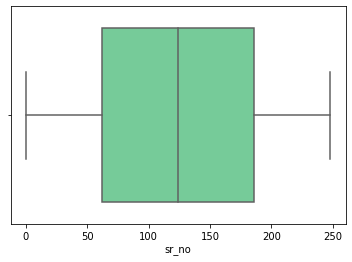

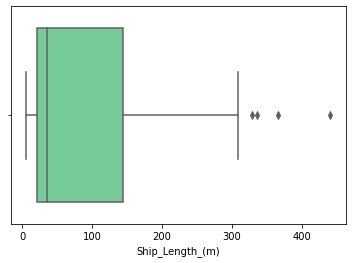

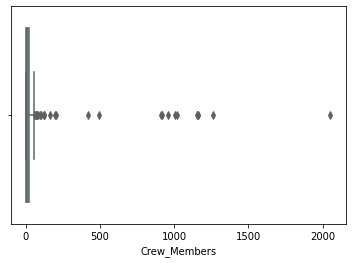

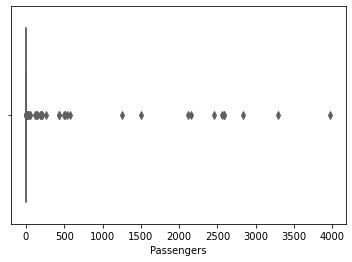

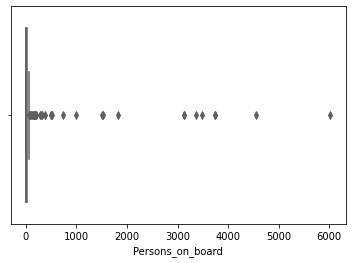

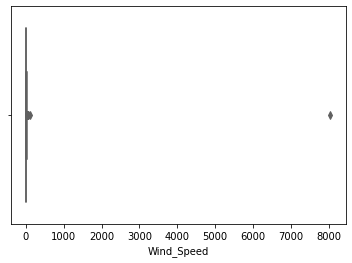

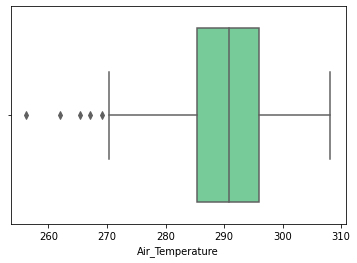

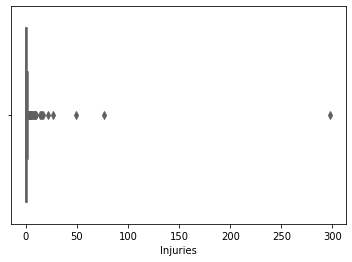

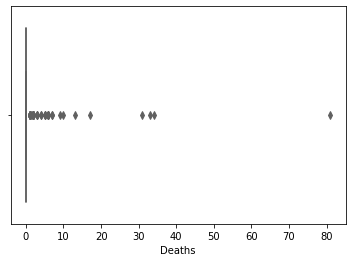

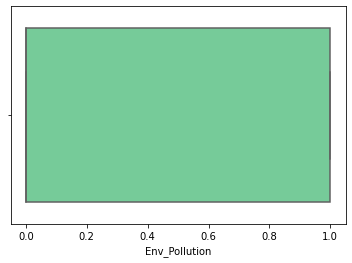

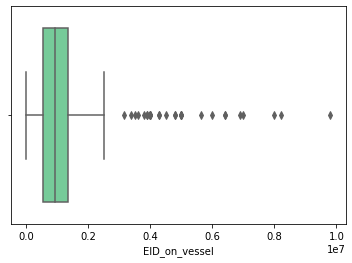

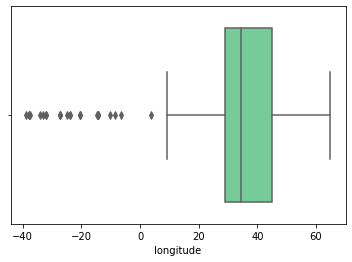

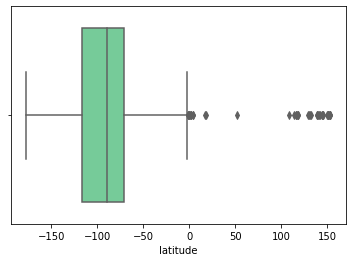

In [ ]:
## Checking the Outliers in the Dataset.

numerical_col = marine.select_dtypes(include = ['int','float']).columns
categorical_col = marine.select_dtypes(include =['object']).columns

for i in numerical_col:
    sns.boxplot(x = marine[i], data = marine, color = '#68D997')
    # sns.swarmplot(x = marine[i], data = marine,color = '#ff6961')
    # sns.kdeplot(x = marine[i], data = marine,color = '#ff6961')
    
    plt.show()

In [ ]:
## Function showing the Outliers counts in the Numerical Columns.

numerical_col = marine.select_dtypes(['int','float'])
for i in numerical_col[1:-3]:
    Q3, Q1 = np.percentile(marine[i], [95,5])
    iqr= Q3 - Q1
    low = Q1 - (1.5*iqr)
    high = Q3 + (1.5*iqr)
    minimum = marine[i].min()
    maximum = marine[i].max()
    x=marine[i][marine[i]>high]
    y=marine[i][marine[i]<low]
    print(i,'has ===>  ',x.shape[0]+y.shape[0],'outliers','  low -->',low,'   high -->',high,'min :',minimum ,'max :',maximum)

sr_no has ===>   0 outliers   low --> -322.4    high --> 570.4 min : 0 max : 248
Ship_Length_(m) has ===>   0 outliers   low --> -412.02099999999996    high --> 715.9549999999999 min : 5.49 max : 441.1
Crew_Members has ===>   10 outliers   low --> -294.7    high --> 496.5 min : 1.0 max : 2051.0
Passengers has ===>   10 outliers   low --> -783.5999999999998    high --> 1305.9999999999995 min : 0.0 max : 3972.0
Persons_on_board has ===>   9 outliers   low --> -958.299999999998    high --> 1602.4999999999968 min : 0.0 max : 6023.0
Wind_Speed has ===>   2 outliers   low --> -33.43    high --> 61.21 min : 0.36 max : 8046.72
Air_Temperature has ===>   0 outliers   low --> 234.04500000000004    high --> 343.365 min : 256.15 max : 308.15
Injuries has ===>   5 outliers   low --> -12.0    high --> 20.0 min : 0 max : 298
Deaths has ===>   5 outliers   low --> -9.0    high --> 15.0 min : 0 max : 81
Env_Pollution has ===>   0 outliers   low --> -1.5    high --> 2.5 min : 0.0 max : 1.0
EID_on_vessel

In [ ]:
## Treating the Outliers. in [5 to 95] percent significance level

p0_ = []
p100_ = []
iqr_ = []
high_ = []
low_ = []
for i in numerical_col.columns[1:-2]:
    p0 : int =marine[i].min()
    p100: int =marine[i].max()
    
    p0_.append(p0)
    p100_.append(p100)

    q1=marine[i].quantile(0.05)
    q2=marine[i].quantile(0.5)
    q3=marine[i].quantile(0.95)
    
    iqr=q3-q1
    iqr_.append(iqr)
    
    low: int = q1 - (1.5 * iqr)
    high: int = q3 + (1.5 * iqr)
    
    low_.append(low)
    high_.append(high)
    #using flooring and Capping to treat outliers.
    marine[i] = marine[i].clip(lower = low, upper = high)
    


In [ ]:
## Rechecking if worked or not

## Function showing the Outliers counts in the Numerical Columns.

numerical_col = marine.select_dtypes(['int','float'])
for i in numerical_col[:]:
    Q3, Q1 = np.percentile(marine[i], [95,5])
    iqr= Q3 - Q1
    low = Q1 - (1.5*iqr)
    high = Q3 + (1.5*iqr)
    x=marine[i][marine[i]>high]
    y=marine[i][marine[i]<low]
    print(i,'has ===>  ',x.shape[0]+y.shape[0],'outliers','  low -->',low,'   high -->',high)


sr_no has ===>   0 outliers   low --> -322.4    high --> 570.4
Ship_Length_(m) has ===>   0 outliers   low --> -412.02099999999996    high --> 715.9549999999999
Crew_Members has ===>   0 outliers   low --> -294.7    high --> 496.5
Passengers has ===>   0 outliers   low --> -783.5999999999998    high --> 1305.9999999999995
Persons_on_board has ===>   0 outliers   low --> -958.299999999998    high --> 1602.4999999999968
Wind_Speed has ===>   0 outliers   low --> -33.43    high --> 61.21
Air_Temperature has ===>   0 outliers   low --> 234.04500000000004    high --> 343.365
Injuries has ===>   0 outliers   low --> -12.0    high --> 20.0
Deaths has ===>   0 outliers   low --> -9.0    high --> 15.0
Env_Pollution has ===>   0 outliers   low --> -1.5    high --> 2.5
EID_on_vessel has ===>   0 outliers   low --> -7129999.999999998    high --> 12149999.999999996
longitude has ===>   0 outliers   low --> -146.335614244    high --> 180.385732796
latitude has ===>   0 outliers   low --> -629.981942

In [ ]:
check_null(marine)


Total Missing Columns  :  6


,Features,Missing Total,Percentage_missing
17,Human_and_organisational_factors_incident_type,104,41.767068
14,Sea_State,48,19.277108
12,Wind_Direction,25,10.040161
16,General_Human_and_organisational_factors,18,7.228916
5,Ship_Base_Type,2,0.803213
29,Raw,2,0.803213


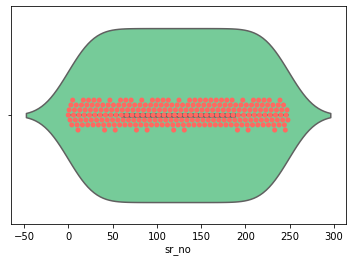

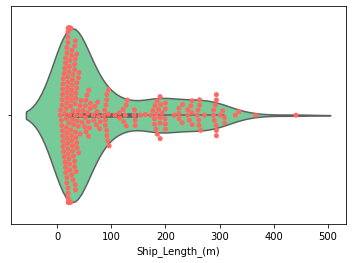

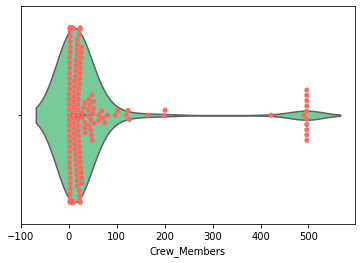

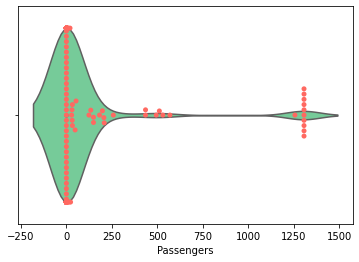

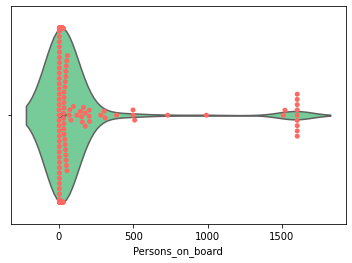

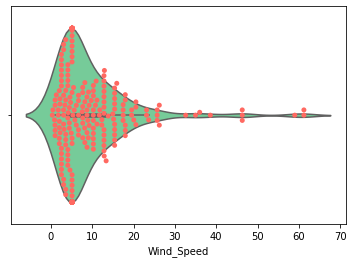

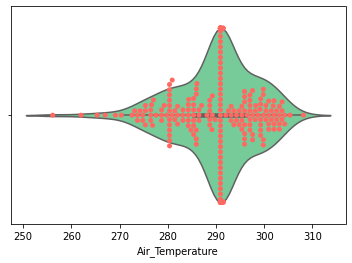

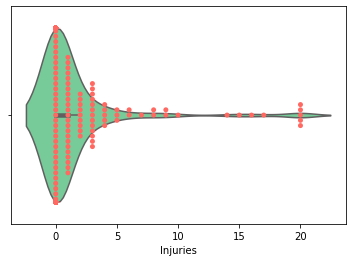

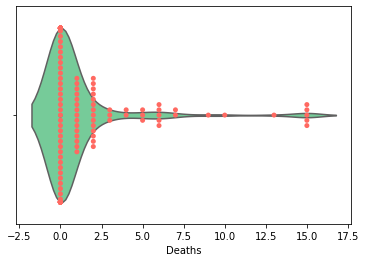

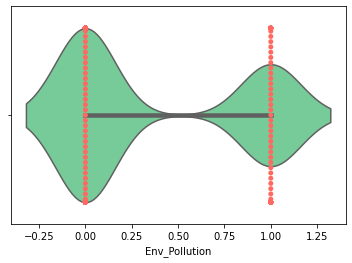

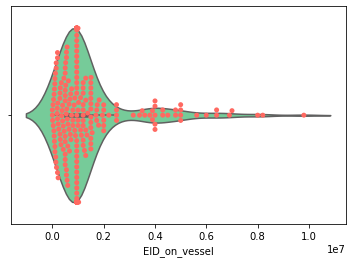

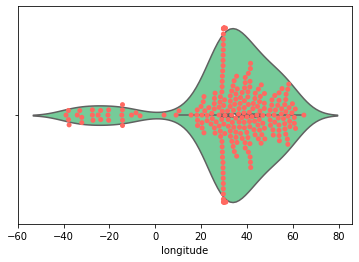

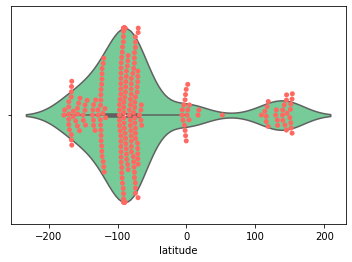

In [ ]:
## Checking the Outliers in the Dataset.

numerical_col = marine.select_dtypes(include = ['int','float']).columns
categorical_col = marine.select_dtypes(include =['object']).columns

for i in numerical_col:
    sns.violinplot(x = marine[i], data = marine, color = '#68D997')
    sns.swarmplot(x = marine[i], data = marine,color = '#ff6961')
    # sns.kdeplot(x = marine[i], data = marine,color = '#ff6961')
    
    plt.show()

## Visualise

In [ ]:
## Color Pallete is Defined
# new_color = ['#ff6961','#ffb480','#f8f38d','#42d6a4','#08cad1','#59adf6','#9d94ff','#c780e8']
# new_color = sns.set_palette("Blues")

# Create an array with the colors you want to use
new_color =["#537AB9","#008EAA","#00A9B1","#15C2A9","#68D997","#AFEB80","#F9F871","#7C6AAF"]
# Set your custom color palette
sns.set_palette(sns.color_palette(new_color))

In [ ]:
# Mapping the Values to Ship_base_type
ships_cat = {1: 'Fishing', 2: 'Towing', 3: 'Passenger', 4: 'Others', 5: 'Cargo', 6: 'Bulk', 7: 'Tanker', 8: 'Cruise'}

# ships
marine.Ship_Base_Type = marine.Ship_Base_Type.map(ships_cat)

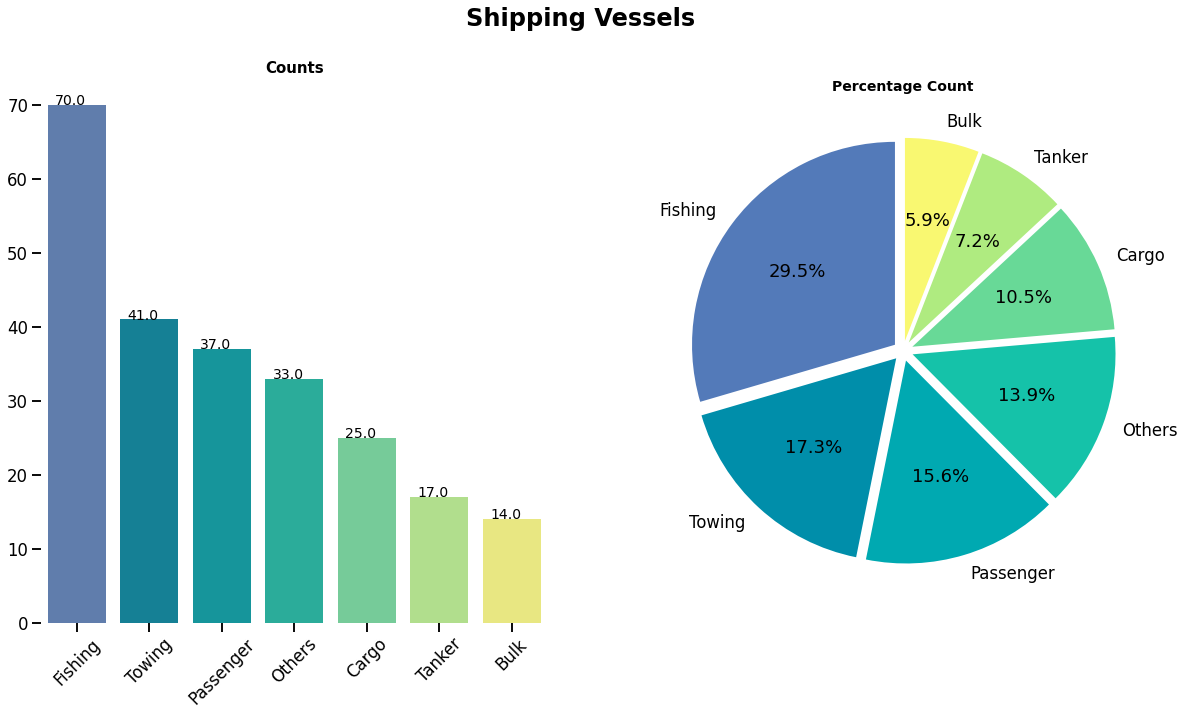

In [ ]:
## Ship types

# Plotting the Barplot and Pie chart for Ship types distribution
fig = plt.figure(figsize=([20,10]))
# new_color = sns.set_palette("Reds")
sns.set_context("talk")
plt.suptitle("Shipping Vessels", weight = 'bold', fontsize = 24)
grid = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)


label = list(marine.Ship_Base_Type.value_counts().sort_values(ascending=False).head(7).index)
values = list(marine.Ship_Base_Type.value_counts().sort_values(ascending=False).head(7).values)

ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Counts', fontsize = 15, weight = 'bold')
sns.barplot(x = label, y= values, data=marine , palette=new_color)
plt.xticks(rotation = 45)

#annotation
for spine in ax1.spines.values():
    spine.set_visible(False)
for p in ax1.patches:
    ax1.annotate('{}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()), fontsize = 14)
    

    
ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Percentage Count',weight = 'bold', fontsize = 14)
ax2.pie(values ,labels = label,explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05),autopct = "%1.1f%%",startangle=90, colors = new_color)
ax2.axis = 'equal'


plt.show()
    



- Majority of vessels are of Fishing types followed by Towing and Passengers.
- Tanker and Bulk are in Minority.

In [ ]:
## Accident types

# Mapping the values of Accident_base_type 
accident_cat = {1: 'Collision', 2:'Grounding', 3:'Heavy Weather', 4:'Fires and Explosion', 5:'Other',6:'Capsizing'}

# accident
marine.Accident_Base_Type = marine.Accident_Base_Type.astype('int')
marine.Accident_Base_Type = marine.Accident_Base_Type.map(accident_cat)

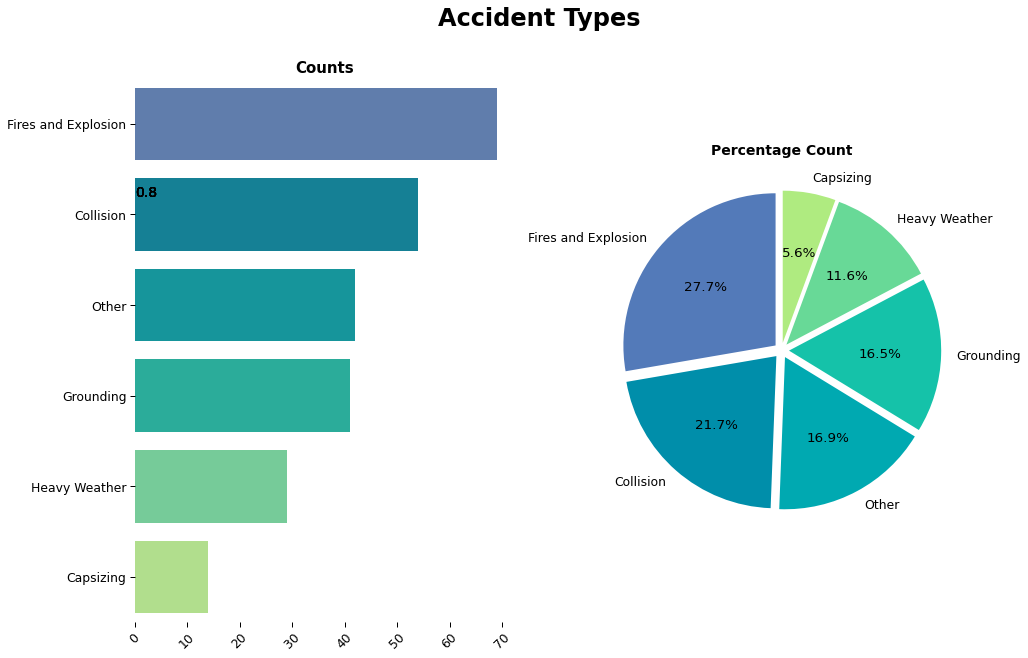

In [ ]:
fig = plt.figure(figsize=([15,10]))
# new_color = sns.set_palette("Reds")

plt.suptitle("Accident Types", weight = 'bold', fontsize = 24)
grid = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)


label = list(marine.Accident_Base_Type.value_counts().sort_values(ascending=False).head(6).index)
values = list(marine.Accident_Base_Type.value_counts().sort_values(ascending=False).head(6).values)

ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Counts', fontsize = 15, weight = 'bold')
sns.barplot(y = label, x = values, data=marine , palette=new_color)
plt.xticks(rotation = 45)

for spine in ax1.spines.values():
    spine.set_visible(False)
for p in ax1.patches:
    ax1.annotate('{}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()), fontsize = 14)
    

    
ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Percentage Count',weight = 'bold', fontsize = 14)
ax2.pie(values ,labels = label,explode=(0.05,0.05,0.05,0.05,0.05,0.05),autopct = "%1.1f%%",startangle=90, colors = new_color)
ax2.axis = 'equal'


plt.show()
    

- Machinery Fire and Explosion are in Majority Causes of Accidents followed by Collision

In [ ]:
## Distribution of Location Types where accident occured

lal ={ 0 : 'Sea', 1 : 'Port' ,2: 'Gulf or Canal' ,3: 'River' , 4: 'Lake'}
a = marine.Location_Type.map(lal)

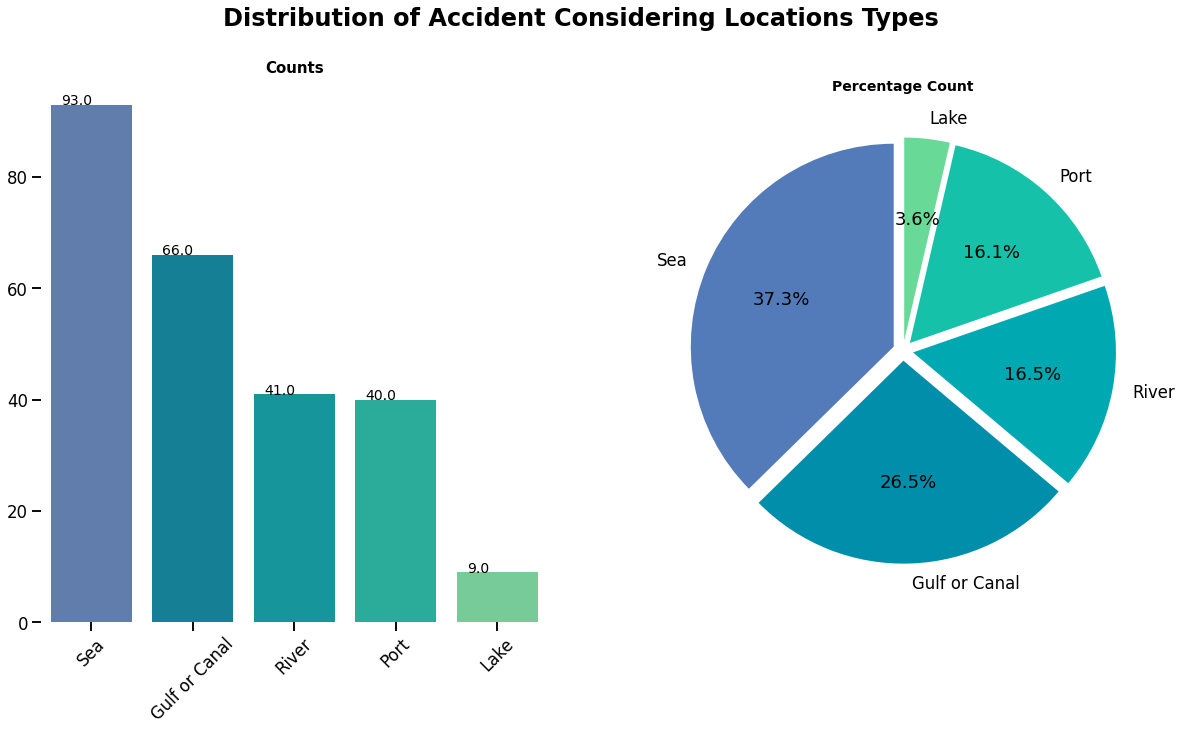

In [ ]:
fig = plt.figure(figsize=([20,10]))
# new_color = sns.set_palette("Reds")

plt.suptitle("Distribution of Accident Considering Locations Types", weight = 'bold', fontsize = 24)
grid = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)


label = list(a.value_counts().sort_values(ascending=False).head(6).index)
values = list(a.value_counts().sort_values(ascending=False).head(6).values)

ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Counts', fontsize = 15, weight = 'bold')
sns.barplot(x = label, y= values, data=marine , palette=new_color)
plt.xticks(rotation = 45)

for spine in ax1.spines.values():
    spine.set_visible(False)
for p in ax1.patches:
    ax1.annotate('{}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()), fontsize = 14)
    

    
ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Percentage Count',weight = 'bold', fontsize = 14)
ax2.pie(values ,labels = label,explode=(0.05,0.05,0.05,0.05,0.05),autopct = "%1.1f%%",startangle=90, colors = new_color)
ax2.axis = 'equal'


plt.show()
    

- Most of Accidents are Occured in Sea with 37% and lowest in lake with 3.6 %

In [ ]:
marine.columns

Index(['sr_no', 'Vessel_Name', 'Accident_Type', 'Accident_Base_Type',
       'Ship_Type', 'Ship_Base_Type', 'Ship_Length_(m)',
       'Multiple_Ships_Collided_Status', 'Crew_Members', 'Passengers',
       'Persons_on_board', 'Visibility', 'Wind_Direction', 'Wind_Speed',
       'Sea_State', 'Air_Temperature',
       'General_Human_and_organisational_factors',
       'Human_and_organisational_factors_incident_type', 'Date', 'Injuries',
       'Deaths', 'Evacuations', 'Accident_No.', 'Location_Type',
       'Env_Pollution', 'EID_on_vessel', 'longitude', 'latitude', 'Place',
       'Raw'],
      dtype='object')

In [ ]:
## 

In [ ]:
## Ship wise Accidents.

b = marine.groupby(['Ship_Base_Type','Accident_Base_Type']).count()

In [ ]:
b.reset_index(drop = True)

,sr_no,Vessel_Name,Accident_Type,Ship_Type,Ship_Length_(m),Multiple_Ships_Collided_Status,Crew_Members,Passengers,Persons_on_board,Visibility,Wind_Direction,Wind_Speed,Sea_State,Air_Temperature,General_Human_and_organisational_factors,Human_and_organisational_factors_incident_type,Date,Injuries,Deaths,Evacuations,Accident_No.,Location_Type,Env_Pollution,EID_on_vessel,longitude,latitude,Place,Raw
0,5,5,5,5,5,5,5,5,5,5,4,5,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,3,3,3,3,3,3,3,3,3,3,0,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,3,3,3,3,3,3,3,3,3,3,3,3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
4,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2
5,7,7,7,7,7,7,7,7,7,7,7,7,3,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
6,7,7,7,7,7,7,7,7,7,7,5,7,4,7,7,4,7,7,7,7,7,7,7,7,7,7,7,7
7,9,9,9,9,9,9,9,9,9,9,1,9,7,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
8,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2
9,4,4,4,4,4,4,4,4,4,4,4,4,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


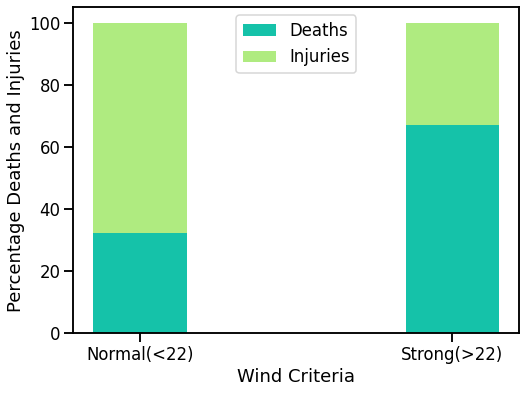

In [ ]:
## Deaths and Injuries by WindSpeed. (Wind speed gusts in m/s at the accident time)

wind = marine[['Wind_Speed','Injuries','Deaths']]

# selecting the wind criteria for normal and strong. 
wind['criteria'] = wind.Wind_Speed.apply(lambda x: "Normal(<22)" if x < 22.0 else "Strong(>22)")

# reseting the index
wind.reset_index(drop = True,inplace = True,)

# calculating
a = wind.groupby('criteria')['Deaths','Injuries'].sum()
a.reset_index(inplace =True)
a['total'] = a.Deaths + a.Injuries
a.Deaths = round(((a.Deaths / a.total) * 100),2)
a.Injuries = round(((a.Injuries / a.total) * 100),2)

# plotting the graphs.
xpos = np.arange(len(a.Deaths))
plt.figure(figsize = (8,6))
barwidth = 0.3
plt.bar(xpos, a.Deaths, color = new_color[3],width = barwidth,label = 'Deaths')
plt.bar(xpos, a.Injuries, bottom = a.Deaths,color = new_color[5],width = barwidth,label = 'Injuries')
plt.xticks(xpos,('Normal(<22)','Strong(>22)'))
plt.xlabel("Wind Criteria")
plt.legend(loc ="upper center")
plt.ylabel("Percentage Deaths and Injuries")
plt.show()

- Distribution of deaths and injuries with respect to wind speed. In this case, we split the dataset into two categories. The first category includes the accidents with light or moderate wind speed conditions, i.e., (0, 22) Knots, whereas the second one includes the cases with strong wind speed conditions greater than 22 knots.

- In the first category, the majority (80%) of the persons on board are injured, while the deaths’ percentage is equal to 20%. On the contrary, the percentage of deaths in the second category is much higher (80% plus) due to the worse wind conditions.

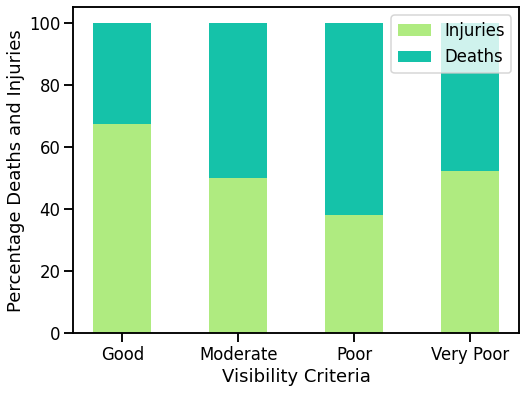

In [ ]:
# Distribution of Deaths and Injuries by Visibility Condition

#creating a separate dataframe
visib = marine[['Visibility','Injuries','Deaths']]
visib.Visibility.reset_index(drop = True,inplace = True,)
b = visib.groupby('Visibility')['Deaths','Injuries'].sum()
b.reset_index(inplace =True)
b = b[1:]
b['total'] = b.Deaths + b.Injuries
b.Deaths = round(((b.Deaths / b.total) * 100),2)
b.Injuries = round(((b.Injuries / b.total) * 100),2)

#plot
xpos = np.arange(len(b.Deaths))
plt.figure(figsize = (8,6))
barwidth = 0.5
plt.bar(xpos, b.Injuries, color = '#AFEB80',width = barwidth,label = 'Injuries')
plt.bar(xpos, b.Deaths, bottom = b.Injuries,color = '#15C2A9',width = barwidth,label = 'Deaths')
plt.xticks(xpos,('Good','Moderate',
                 'Poor',
                 'Very Poor'),rotation = 0)
plt.xlabel("Visibility Criteria")
plt.legend(loc ="upper right")
plt.ylabel("Percentage Deaths and Injuries")
plt.show()

- The distribution of deaths and injuries based on visibility conditions during the accident. In this case, the dataset is split into four categories: good (more than 5 nautical miles), moderate (between 2 and 5 nautical miles), poor (between 1 and 2 nautical miles), and very poor or foggy visibility conditions.

- For the third and especially for the fourth category, deaths overcome the injuries percentage, with 75% and 60% of persons onboard suffering deadly injuries with poor and very poor or foggy visibility conditions.

In [ ]:
## Map

import folium
map = folium.Map(location=[marine.latitude[1],marine.longitude[1]],zoom_start=20)
for i in range(marine.shape[0]):
    map.add_child(folium.Marker(location=[marine.longitude[i],marine.latitude[i]],popup=marine.Accident_Type[i],icon=folium.Icon(color='green')))

map

- Most of Accident are occured in East American Region.

In [ ]:
## Percentages of general human and organisational factors that contribute to the incidents occurrence.

label = list(marine.General_Human_and_organisational_factors.value_counts().sort_values(ascending=False).index)
values = list(marine.General_Human_and_organisational_factors.value_counts().sort_values(ascending=False).values)
df = pd.DataFrame({'Factors':label,
              'Percentage':values})
df.Percentage = round((df.Percentage)/(df.Percentage.sum())*100,2)
df.head(7)

,Factors,Percentage
0,HFACS-MA-22,15.15
1,HFACS-MA-5,15.15
2,HFACS-MA-9,12.12
3,HFACS-MA-7,8.23
4,HFACS-MA-17,6.49
5,HFACS-MA-20,5.19
6,HFACS-MA-3,4.76


- MA-22 and MA-5 has highest involment in Causes of Accident 
- MA-5 if for Assset Management and MA-22 is for Decision Errors.

In [ ]:
## Percentages of the human factors that contribute to grounding incidents

label = list(marine[(marine.Accident_Base_Type == 'Grounding') & (marine.Multiple_Ships_Collided_Status == 0)]
             .Human_and_organisational_factors_incident_type.
            value_counts().sort_values(ascending=False).index)
values = list(marine[(marine.Accident_Base_Type == 'Grounding')& (marine.Multiple_Ships_Collided_Status == 0)]
              .Human_and_organisational_factors_incident_type.
              value_counts().sort_values(ascending=False).values)
df = pd.DataFrame({'Factors':label,
              'Percentage':values})
df.Percentage = round((df.Percentage)/(df.Percentage.sum())*100,2)
df.head(7)

,Factors,Percentage
0,HFACS-Ground-2,12.5
1,HFACS-Ground-20,12.5
2,HFACS-Ground-17,10.0
3,HFACS-Ground-1,10.0
4,HFACS-Ground-22,10.0
5,HFACS-Ground-12,7.5
6,HFACS-Ground-13,7.5


- Grouding Accidents are caused because of Ground-2 which is Judgemental Decisions and Ground-20 which stands for Resource Management. 

In [ ]:
## Percentages of the human factors that contribute to Fire and Explosion incidents


label = list(marine[(marine.Accident_Base_Type == 'Fires and Explosion') & (marine.Multiple_Ships_Collided_Status == 0.0)]
             .Human_and_organisational_factors_incident_type.
            value_counts().sort_values(ascending=False).index)
values = list(marine[(marine.Accident_Base_Type == 'Fires and Explosion') & (marine.Multiple_Ships_Collided_Status == 0.0)]
              .Human_and_organisational_factors_incident_type.
              value_counts().sort_values(ascending=False).values)
df = pd.DataFrame({'Factors':label,
              'Percentage':values})
df.Percentage = round((df.Percentage)/(df.Percentage.sum())*100,2)
df.head(5)

,Factors,Percentage
0,HFACS-MSS-5,29.79
1,HFACS-MSS-17,21.28
2,HFACS-MSS-22,10.64
3,HFACS-MSS-10,6.38
4,HFACS-MSS-8,4.26


- Machinery and Fire Accidents are Occured most because of MSS-5 and MSS-17 which stands for Equipment Faiclities Resource and Technological Environment.

In [ ]:
## Percentages of the human factors that contribute to collision incidents.

label = list(marine[(marine.Accident_Base_Type == 'Collision') & (marine.Multiple_Ships_Collided_Status == 0)]
             .Human_and_organisational_factors_incident_type.
            value_counts().sort_values(ascending=False).index)
values = list(marine[(marine.Accident_Base_Type == 'Collision') & (marine.Multiple_Ships_Collided_Status == 0)]
              .Human_and_organisational_factors_incident_type.
              value_counts().sort_values(ascending=False).values)
df = pd.DataFrame({'Factors':label,
              'Percentage':values})
df.Percentage = round((df.Percentage)/(df.Percentage.sum())*100,2)
df.head(5)

,Factors,Percentage
0,HFACS-Coll-2,17.24
1,HFACS-Coll-14,13.79
2,HFACS-Coll-3,10.34
3,HFACS-Coll-19,10.34
4,HFACS-Coll-7,6.90


- Collision Accidents are Caused most by Decision Errors and Planned Inappropriate Actions.

In [ ]:
## Show the line plot of Deaths Per year.

import plotly.express as px
a = marine.groupby(marine.Date)['Deaths'].sum()
b = marine.groupby(marine.Date)['Injuries'].sum()
px.line(a, x =a.index[:], y=a.values[:] ,labels = {'a.index' : 'Years',
                                                   'a.values': 'Deaths'}, title='Deaths / Year').update_layout(xaxis_title="Year", yaxis_title="Deaths")
# px.line(b, x =b.index, y=b.values ,labels = {'b.index' : 'Years',
#                                                    'b.values': 'Injuries'}, title='Injuries / Year').update_layout(xaxis_title="Year", yaxis_title="Injuries")


- we see proportion of Accident is Increasing since 2010 as Reporting system of Accidents is Increased so almost every accident is monitored now and also beacuse of traffic in Sea.

In [ ]:
## Show the line plot of Injuries Per year.

import plotly.express as px
a = marine.groupby(marine.Date)['Deaths'].sum()
b = marine.groupby(marine.Date)['Injuries'].sum()
# px.line(a, x =a.index[2:], y=a.values[2:] ,labels = {'a.index' : 'Years',
#                                                    'a.values': 'Deaths'}, title='Deaths / Year').update_layout(xaxis_title="Year", yaxis_title="Deaths")
px.line(b, x =b.index, y=b.values ,labels = {'b.index' : 'Years',
                                                   'b.values': 'Injuries'}, title='Injuries / Year').update_layout(xaxis_title="Year", yaxis_title="Injuries")


- we see proportion of Accident is Increasing since 2010 as Reporting system of Accidents is Increased so almost every accident is monitored now and also beacuse of traffic in Sea.

In [ ]:
# marine.to_csv("/Users/chinmay/Desktop/Marine_final_project/rubiscape_marine.csv")

# (Target --> Environment Pollution)

In [ ]:
marine1 = copy.deepcopy(marine)

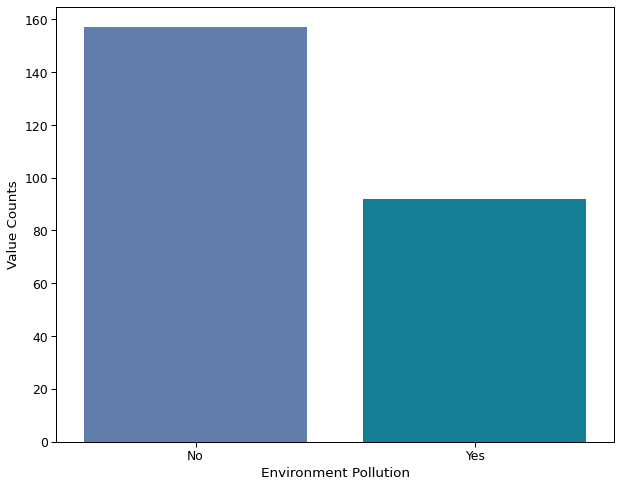

<Figure size 432x288 with 0 Axes>

In [ ]:
# Displaying the Target Feature.
plt.figure(figsize=(10,8))
sns.countplot(x= 'Env_Pollution', data = marine1)
# plt.title("Environment Pollution")
plt.xlabel("Environment Pollution")
plt.ylabel("Value Counts")
plt.xticks([0,1],['No','Yes'])
plt.show()
plt.savefig('foo.jpg', bbox_inches='tight')


In [ ]:
# gives the null non null count and Data type of dataset

marine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   sr_no                                           249 non-null    int64         
 1   Vessel_Name                                     249 non-null    object        
 2   Accident_Type                                   249 non-null    object        
 3   Accident_Base_Type                              249 non-null    object        
 4   Ship_Type                                       249 non-null    object        
 5   Ship_Base_Type                                  247 non-null    object        
 6   Ship_Length_(m)                                 249 non-null    float64       
 7   Multiple_Ships_Collided_Status                  249 non-null    object        
 8   Crew_Members                                    24

In [ ]:
check_column_type(marine1)

Numerical Columns -->>  ['sr_no' 'Ship_Length_(m)' 'Crew_Members' 'Passengers' 'Persons_on_board'
 'Wind_Speed' 'Air_Temperature' 'Injuries' 'Deaths' 'Env_Pollution'
 'EID_on_vessel' 'longitude' 'latitude']

Categorical Columns -->>  ['Vessel_Name' 'Accident_Type' 'Accident_Base_Type' 'Ship_Type'
 'Ship_Base_Type' 'Multiple_Ships_Collided_Status' 'Visibility'
 'Wind_Direction' 'Sea_State' 'General_Human_and_organisational_factors'
 'Human_and_organisational_factors_incident_type' 'Evacuations'
 'Accident_No.' 'Location_Type' 'Place' 'Raw']


Total Numerical Columns :  13
Total Categorical Columns :  16


## Chi Square considering Environment Pollution

    As in our dataset, we have various categorical features As the correlation matrix only interprets the numerical data and tells us the correlation with the other feature, it will not tell us the relationship between the categorical features. Thus, we are using the chi2-test to evaluate the categorical feature relation with Environment Pollution. Hypothesis: Before applying the chi2 test, we will have two hypotheses.

    Null Hypothesis H0: Feature have no relation to Environment Pollution

    Alternative Hypothesis Ha: Feature has a relation with Environment Pollution

    If the p-value is less than 0.05 or 5% ,accept the Ha and reject the H0
    If the p-value is greater than 0.05 or 5%, accept the H0 and reject Ha

In [ ]:

## Chi2 test for each column with Environment Pollution

from scipy.stats import chi2_contingency


for i in marine1.select_dtypes('object'):
    # creating  the cross table with pandas cross tab 
    dataset_table=pd.crosstab(marine[i],marine['Env_Pollution'])


    #degree of freedom (dof) is [number of col -1]*[number of rows - 1]
    #p is p-value at 5%
    stat, p, dof, expected = chi2_contingency(dataset_table)  

    # interpret p-value 
    # alpha is confidance interval of 95%, means considering the all the variance value under 95% of the variance distibution
    alpha = 0.05
    print(f"\nFor {i} we get ")
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')


For Vessel_Name we get 
p value is 0.30059125627043515
Independent (H0 holds true)

For Accident_Type we get 
p value is 0.005200451527845096
Dependent (reject H0)

For Accident_Base_Type we get 
p value is 5.45938611601681e-07
Dependent (reject H0)

For Ship_Type we get 
p value is 0.019144303874897232
Dependent (reject H0)

For Ship_Base_Type we get 
p value is 1.5272010914328166e-09
Dependent (reject H0)

For Multiple_Ships_Collided_Status we get 
p value is 0.5228043641201028
Independent (H0 holds true)

For Visibility we get 
p value is 0.2108113735450959
Independent (H0 holds true)

For Wind_Direction we get 
p value is 0.12810000705045999
Independent (H0 holds true)

For Sea_State we get 
p value is 0.3024156465685781
Independent (H0 holds true)

For General_Human_and_organisational_factors we get 
p value is 0.1255156013208659
Independent (H0 holds true)

For Human_and_organisational_factors_incident_type we get 
p value is 0.6666857812097605
Independent (H0 holds true)

For E

- we conclude that Accident Type , Ship type are dependent on Environmental Pollution.

## Feature Selection feature ('Environment Pollution')

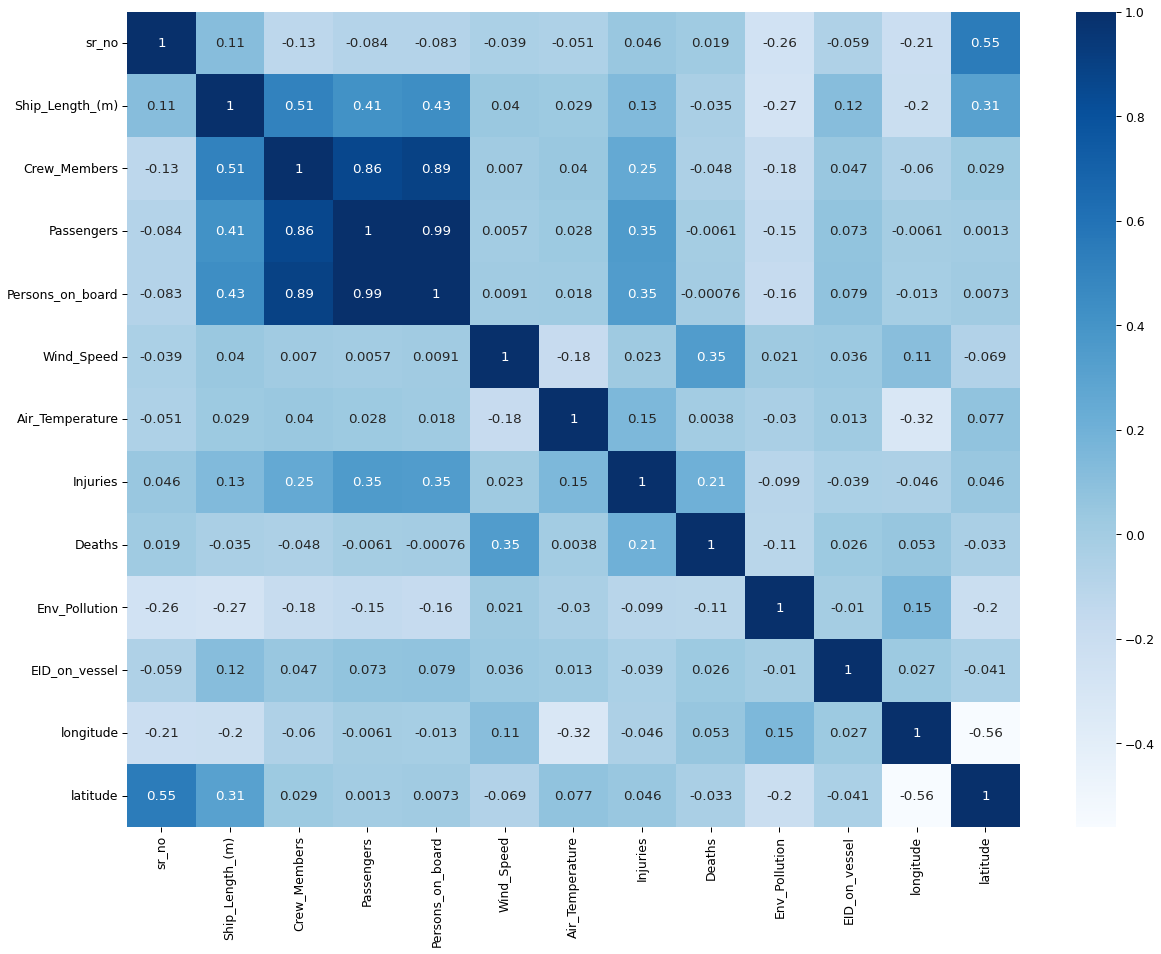

In [ ]:
## Correlation Matrix.

corr1 = marine1.corr()
plt.figure(figsize = [20,15])
sns.heatmap(corr1, annot=True, cmap="Blues" )
plt.show()

- Features like Passengers, Crew members and Person on Board are Highly Correlated with each other with Correlation of more than 0.8.
- Highly Correlated features can be removed.

In [ ]:
## displaying columns names.

marine1.columns

Index(['sr_no', 'Vessel_Name', 'Accident_Type', 'Accident_Base_Type',
       'Ship_Type', 'Ship_Base_Type', 'Ship_Length_(m)',
       'Multiple_Ships_Collided_Status', 'Crew_Members', 'Passengers',
       'Persons_on_board', 'Visibility', 'Wind_Direction', 'Wind_Speed',
       'Sea_State', 'Air_Temperature',
       'General_Human_and_organisational_factors',
       'Human_and_organisational_factors_incident_type', 'Date', 'Injuries',
       'Deaths', 'Evacuations', 'Accident_No.', 'Location_Type',
       'Env_Pollution', 'EID_on_vessel', 'longitude', 'latitude', 'Place',
       'Raw'],
      dtype='object')

In [ ]:
## Dropping the Inpendent from Target Variable Categorical Columns from Chi Square Test selection.
## and Dropping the Numerical Columns using the Correlation Matrix

marine1.drop(columns = {'sr_no','Raw','Place','Accident_No.','Date',
                        'General_Human_and_organisational_factors',
                       'Human_and_organisational_factors_incident_type','Crew_Members',
                        'Passengers','Vessel_Name','latitude','Accident_Type','Ship_Type',
                       'Wind_Direction','Sea_State','latitude','longitude'},axis = 1,inplace = True)

In [ ]:
marine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Accident_Base_Type              249 non-null    object 
 1   Ship_Base_Type                  247 non-null    object 
 2   Ship_Length_(m)                 249 non-null    float64
 3   Multiple_Ships_Collided_Status  249 non-null    object 
 4   Persons_on_board                249 non-null    float64
 5   Visibility                      249 non-null    object 
 6   Wind_Speed                      249 non-null    float64
 7   Air_Temperature                 249 non-null    float64
 8   Injuries                        249 non-null    float64
 9   Deaths                          249 non-null    float64
 10  Evacuations                     249 non-null    object 
 11  Location_Type                   249 non-null    object 
 12  Env_Pollution                   249 

In [ ]:
marine1.select_dtypes('object').columns

Index(['Accident_Base_Type', 'Ship_Base_Type',
       'Multiple_Ships_Collided_Status', 'Visibility', 'Evacuations',
       'Location_Type'],
      dtype='object')

In [ ]:
## Converting from floating to integer numbers.
## Label Encoding the Variables.

label_encoder = LabelEncoder()
for i in marine1.select_dtypes('object').columns:
    marine1[i] = label_encoder.fit_transform(marine1[i])

In [ ]:
marine1.head()

,Accident_Base_Type,Ship_Base_Type,Ship_Length_(m),Multiple_Ships_Collided_Status,Persons_on_board,Visibility,Wind_Speed,Air_Temperature,Injuries,Deaths,Evacuations,Location_Type,Env_Pollution,EID_on_vessel
0,1,2,263.04,0,1602.5,1,19.55,285.92,0.0,0.0,1,1,0.0,950000.0
1,1,2,258.59,0,1602.5,1,3.09,287.03,0.0,0.0,1,1,0.0,950000.0
2,2,5,441.10,0,731.0,1,2.57,299.26,4.0,2.0,0,1,1.0,950000.0
3,1,2,329.18,0,1602.5,1,10.80,299.26,0.0,0.0,1,1,0.0,950000.0
4,3,2,293.52,0,1602.5,1,4.12,289.82,0.0,0.0,1,0,1.0,950000.0


Feature: Accident_Base_Type, Score: 0.08169
Feature: Ship_Base_Type, Score: 0.09783
Feature: Ship_Length_(m), Score: 0.18500
Feature: Persons_on_board, Score: 0.15802
Feature: Wind_Speed, Score: 0.09942
Feature: Air_Temperature, Score: 0.10299
Feature: EID_on_vessel, Score: 0.09794


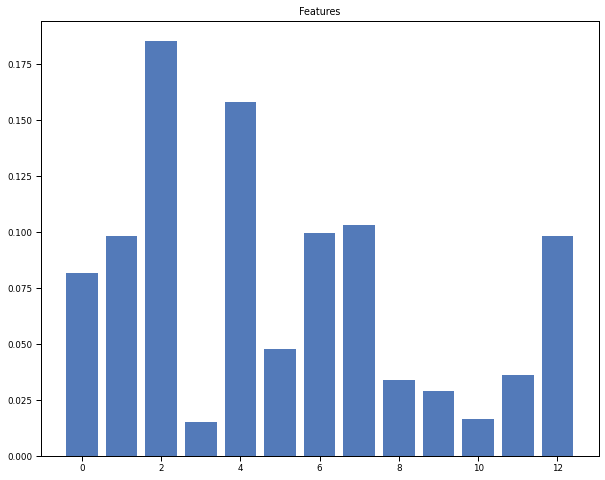

In [ ]:
## Using Model feature Importance by Random Forest.
sns.set_context('paper')
x = marine1.drop('Env_Pollution',axis=1)
y = marine1.Env_Pollution

#creating empty list for features.
env_feature = []
model = RandomForestClassifier()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    # keeping threshold of 0.05
    if v>0.05:
        print('Feature: %s, Score: %.5f'% (x.columns[i],v))
        env_feature.append(x.columns[i])
        
# plot feature importance
plt.figure(figsize = (10,8))
plt.title("Features")
plt.bar([x for x in range(len(importance))], importance)
plt.show()



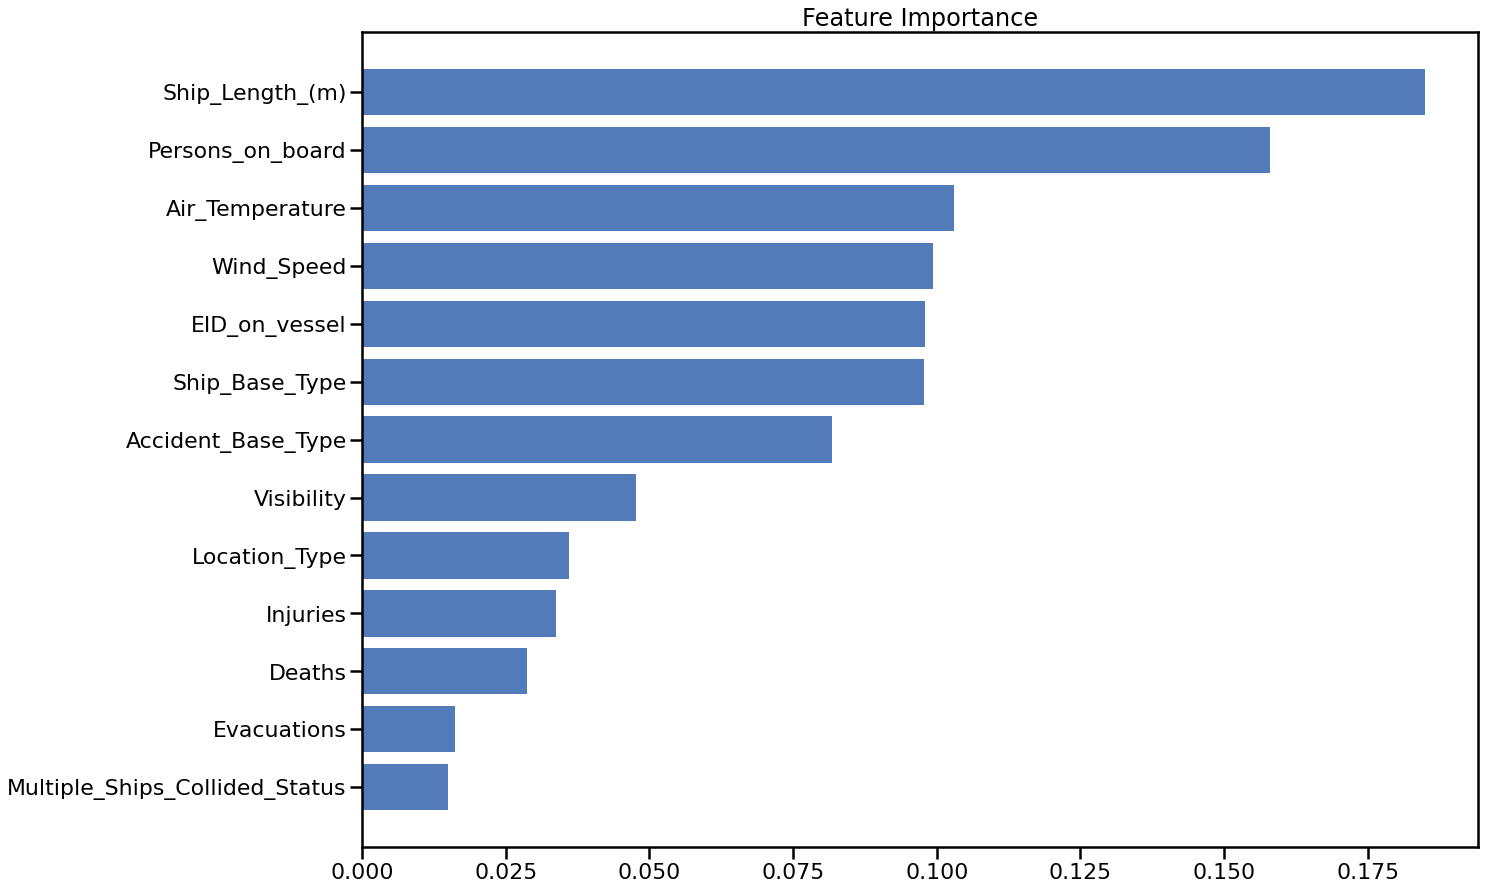

In [ ]:
## Arranging the Features in Decreasing Order.
sns.set_context('poster')
importances_values = model.feature_importances_
importances = pd.DataFrame(importances_values, columns=['importance'])
feature_data = pd.DataFrame(x.columns, columns=['feature'])
importance = pd.concat([feature_data, importances], axis=1)
importance = importance.sort_values(['importance'], ascending=True)
importance.set_index('feature', inplace=True)
importance = importance.reset_index()

plt.figure(figsize=(20, 15))
plt.barh(importance['feature'].tail(18), importance['importance'].tail(18), color='#537AB9')
plt.title('Feature Importance')
plt.show()

- Ship Length, Person On board, Air Temperature, Wind Speed, Ship and Accident type are Important Features in Accident that effects the Environment Pollution.

In [ ]:
## At last we get out 7 features using Feature Selection.

env_feature

['Accident_Base_Type',
 'Ship_Base_Type',
 'Ship_Length_(m)',
 'Persons_on_board',
 'Wind_Speed',
 'Air_Temperature',
 'EID_on_vessel']

## Model Building.

    Environment Pollution Prediction ( 1 Yes, 0 NO)
    
    Affects CSR activities.(corporate social responsibility)
    
    Corporate Social Responsibility (CSR) is the idea that a company should be a good neighbour and think about how its actions will affect the environment and people Sustainability. also affecting to the Marine Life which causes huge impact on the reputation of any company.

In [ ]:
## Unique counts of Target Feature (1 is yes and 0 is no)

marine1.Env_Pollution.value_counts()

0.0    157
1.0     92
Name: Env_Pollution, dtype: int64

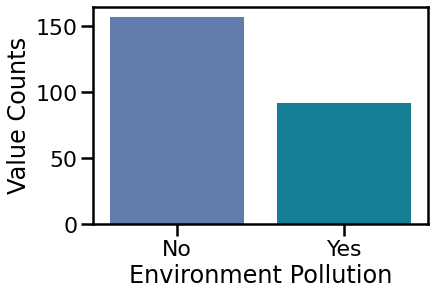

In [ ]:
# plt.title("Environment Pollution")
sns.countplot(x='Env_Pollution',data =marine1)
plt.xlabel("Environment Pollution")
plt.ylabel("Value Counts")
plt.xticks([0,1],['No','Yes'])
plt.show()

In [ ]:
## Defining X and Y

x_env = marine1[env_feature]
y_env = marine1.Env_Pollution

In [ ]:
## Applying MinMax Scaling and Train Test Spliting with 0.3% test size.


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
list_col = x_env.columns
x_env[list_col] = scaler.fit_transform(x_env[list_col])


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_env,
                                                    y_env,
                                                    test_size=0.3,
                                                    random_state=42)


In [ ]:
## Applying Models

Models = [LogisticRegression(max_iter=100), KNeighborsClassifier(),RandomForestClassifier(),XGBClassifier(),GaussianNB(),DecisionTreeClassifier(),GradientBoostingClassifier(),SVC()]
model_names : str = ['Logistic Regression', 'KNN','Random Forest','XGBoost','Naive Bayes','Decision Tree','Gradient Boosting','SVM']

In [ ]:
# Training the Models.

# Creating List for Accuracy, F1 Score and Time
final_train_accuracy = []
final_test_accuracy = []
final_F1 = []
final_time = []
final_cross_val_train = []
final_cross_val_test = []
precision = []
recall = []

import time
# Looping Each Model for training
for model in Models:
    classifier = model
    start = time.time()
    
    classifier.fit(x_train, y_train)
    y_train_pred = classifier.predict(x_train)
    y_pred=classifier.predict(x_test)
    
    stop = time.time()
    acc_test = accuracy_score(y_test,y_pred)
    acc_train = accuracy_score(y_train,y_train_pred)
    f1 = f1_score(y_test,y_pred)
  
    
    
    # t = stop - start
    from sklearn.model_selection import cross_val_score

    cross_acc_train = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
    cross_acc_test = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10)

    cross_train = (cross_acc_train.mean()*100)
    cross_test = (cross_acc_test.mean()*100)

    print(f"Model : {model} having Training Accuracy Score : {acc_test:.2f} with Testing Accuracy Score : {acc_train:.2f} and F1 Score : {f1:.2f} with Time : {stop - start:.2f}")
    print("Training Cross Validation Accuracy : {:.2f} %".format(cross_train.mean()))
    print("Testing Cross Validation Accuracy : {:.2f} %".format(cross_test.mean()))
      
    print("Classification Test  Report \n",classification_report(y_test,y_pred))
    print("Classification Train Report \n",classification_report(y_train,y_train_pred))
    


    print('*'*100)

    final_train_accuracy.append(round(acc_train * 100, 2))
    final_test_accuracy.append(round(acc_test * 100, 2))
    final_F1.append(round(f1_score(y_test,y_pred) * 100, 2))
    final_time.append(round((stop-start),2))
    final_cross_val_train.append(round(cross_train))
    final_cross_val_test.append(round(cross_test))


Model : LogisticRegression() having Training Accuracy Score : 0.59 with Testing Accuracy Score : 0.62 and F1 Score : 0.21 with Time : 0.01
Training Cross Validation Accuracy : 57.48 %
Testing Cross Validation Accuracy : 69.46 %
Classification Test  Report 
               precision    recall  f1-score   support

         0.0       0.68      0.77      0.72        52
         1.0       0.25      0.17      0.21        23

    accuracy                           0.59        75
   macro avg       0.46      0.47      0.46        75
weighted avg       0.55      0.59      0.56        75

Classification Train Report 
               precision    recall  f1-score   support

         0.0       0.63      0.90      0.74       105
         1.0       0.56      0.20      0.30        69

    accuracy                           0.62       174
   macro avg       0.60      0.55      0.52       174
weighted avg       0.60      0.62      0.56       174

**********************************************************

In [ ]:
data = {'Model Name': model_names,
      'Train_Accuracy': final_train_accuracy,
      'Test Accuracy' : final_test_accuracy,
      'Cross_Train': final_cross_val_train,
      'Cross_Test': final_cross_val_test,
      'F1_Score': final_F1,
      'Time': final_time}

score_data_env_pollution = pd.DataFrame(data)


In [ ]:
score_data_env_pollution.sort_values(by=['F1_Score','Cross_Test'],ascending=False)

,Model Name,Train_Accuracy,Test Accuracy,Cross_Train,Cross_Test,F1_Score,Time
2,Random Forest,100.00,82.67,72,79,69.77,0.17
6,Gradient Boosting,97.13,78.67,68,76,63.64,0.09
3,XGBoost,100.00,78.67,70,70,63.64,0.04
1,KNN,83.91,73.33,74,61,60.00,0.01
5,Decision Tree,100.00,72.00,60,71,55.32,0.00
4,Naive Bayes,61.49,54.67,60,60,55.26,0.00
7,SVM,75.86,70.67,70,68,45.00,0.01
0,Logistic Regression,62.07,58.67,57,69,20.51,0.01


### **Hyperparameter Tunning**

In [ ]:
## used RandomizedSearchCV to obtain the list of parameters for tunning.


from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:

# # ## Used GridSearchCV to obtain the BEST hyper parameters for Random Forest Classifier.

# parameters_rf = {
#     'n_estimators' : [100,200,300,400,500],
#     "max_depth": [2,4,6,8,10,20,None],
#     'min_samples_split': [2, 5, 10], 
#     "min_samples_leaf": [1,2,4],
#     "bootstrap": [True,False]}

# gridsearch = GridSearchCV(RandomForestClassifier(), param_grid=parameters_rf, scoring='roc_auc', cv=3, verbose=2, n_jobs=4)
# gridsearch.fit(x_train, y_train)
# print('Best parameters:{0}'.format(gridsearch.best_params_))
# print('Best AUC score:{0}'.format(gridsearch.best_score_))
# print(gridsearch.cv_results_['mean_test_score'])
# print(gridsearch.cv_results_['params'])

- Best parameters:{'bootstrap': True, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
# Applying the Hyperparameters 

# Best parameters:{'bootstrap': True, 'max_depth': 6, 'max_features':
                #  'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

# Random Forest model with Best Parameters
model = RandomForestClassifier(bootstrap=True, max_depth = 4, max_features='auto', min_samples_leaf=1,
                               min_samples_split = 2,n_estimators=100)
model.fit(x_train,y_train)
y_pred_rf = model.predict(x_test)

print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(f1_score(y_test,y_pred_rf, ))


              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86        52
         1.0       0.68      0.65      0.67        23

    accuracy                           0.80        75
   macro avg       0.77      0.76      0.76        75
weighted avg       0.80      0.80      0.80        75

0.8
0.6666666666666666


## Evaluation Metrics

Text(0.5, 257.44, 'Predicted label')

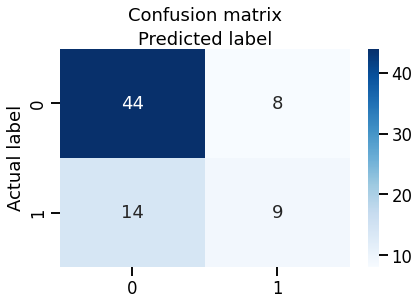

In [ ]:

## Confusion matrix


from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.set_context('talk', font_scale = 1)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

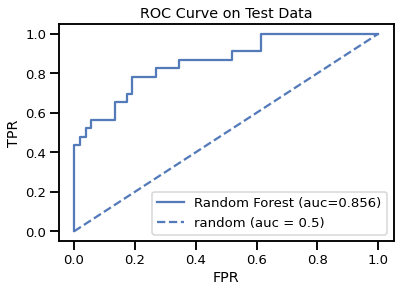

In [ ]:
## ROC Curve

sns.set_context('talk',font_scale=0.8)
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba),3)
plt.plot(fpr,tpr,label="Random Forest (auc="+str(auc)+')', color='#537AB9')
plt.plot([0, 1], [0, 1], label='random (auc = 0.5)', linestyle='--')
plt.title('ROC Curve on Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

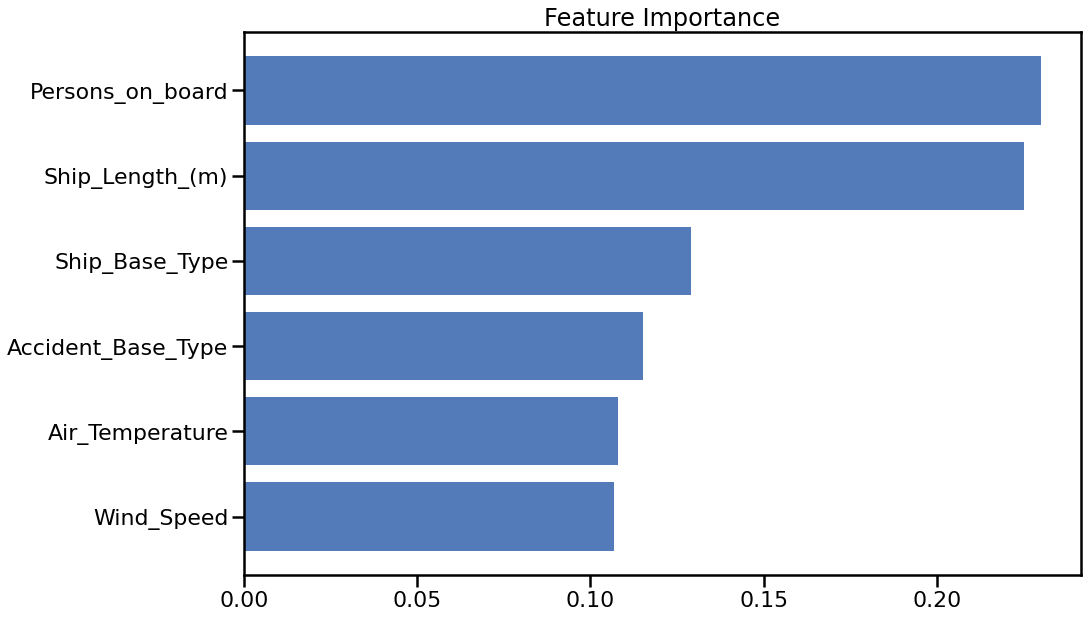

In [ ]:
## Important Features

sns.set_context('poster')
importances_values = model.feature_importances_
importances = pd.DataFrame(importances_values, columns=['importance'])
feature_data = pd.DataFrame(x_train.columns, columns=['feature'])
importance = pd.concat([feature_data, importances], axis=1)
importance = importance.sort_values(['importance'], ascending=True)
importance.set_index('feature', inplace=True)
importance = importance.reset_index()

plt.figure(figsize=(15, 10))
plt.barh(importance['feature'].tail(6), importance['importance'].tail(6), color='#537AB9')
plt.title('Feature Importance')
plt.show()

In [ ]:
marine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   sr_no                                           249 non-null    int64         
 1   Vessel_Name                                     249 non-null    object        
 2   Accident_Type                                   249 non-null    object        
 3   Accident_Base_Type                              249 non-null    object        
 4   Ship_Type                                       249 non-null    object        
 5   Ship_Base_Type                                  247 non-null    object        
 6   Ship_Length_(m)                                 249 non-null    float64       
 7   Multiple_Ships_Collided_Status                  249 non-null    object        
 8   Crew_Members                                    24

# (Target --> Economic Impact on Accident)

In [ ]:
marine2 = copy.deepcopy(marine)

In [ ]:
# creating new column based upon the Economic damage by spliting it into 3 parts low:0 , moderate:1, high:2
# reference : 
def opt(x):
    if x>=0 and x <= 500000:
        return 0
    elif x>=500000 and x <= 5000000:
        return 1
    elif x > 5000000:
        return 2

marine2["EID_cost_range"] = marine2['EID_on_vessel'].map(opt)

In [ ]:
marine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   sr_no                                           249 non-null    int64         
 1   Vessel_Name                                     249 non-null    object        
 2   Accident_Type                                   249 non-null    object        
 3   Accident_Base_Type                              249 non-null    object        
 4   Ship_Type                                       249 non-null    object        
 5   Ship_Base_Type                                  247 non-null    object        
 6   Ship_Length_(m)                                 249 non-null    float64       
 7   Multiple_Ships_Collided_Status                  249 non-null    object        
 8   Crew_Members                                    24

In [ ]:
marine2.head()

,sr_no,Vessel_Name,Accident_Type,Accident_Base_Type,Ship_Type,Ship_Base_Type,Ship_Length_(m),Multiple_Ships_Collided_Status,Crew_Members,Passengers,Persons_on_board,Visibility,Wind_Direction,Wind_Speed,Sea_State,Air_Temperature,General_Human_and_organisational_factors,Human_and_organisational_factors_incident_type,Date,Injuries,Deaths,Evacuations,Accident_No.,Location_Type,Env_Pollution,EID_on_vessel,longitude,latitude,Place,Raw,EID_cost_range
0,0,Celebrity Infinity,Collision,Collision,cruise ship,Cruise,263.04,0,496.5,1306.0,1602.5,Good,South-Southeast,19.55,Choppy Seas,285.92,HFACS-MA-22,HFACS-Coll-2,2016-03-06,0.0,0.0,1,DCA16FM042\n,1,0.0,950000.0,55.343202,-131.651135,"Berth 3, Ketchikan, Alaska, 55¬∞ 20.5' N, 131¬...",[All the water tight doors were closed.] [The ...,1
1,1,Carnival Pride,Collision,Collision,cruise ship,Cruise,258.59,0,496.5,1306.0,1602.5,Good,West-Southwest,3.09,NaN,287.03,HFACS-MA-22,HFACS-Coll-2,2016-08-05,0.0,0.0,1,DCA16FM038,1,0.0,950000.0,39.265412,-76.598481,"Cruise Maryland Terminal, South Locust Point, ...",[The captain was at the bridge overlooking the...,1
2,2,SCANDINAVIAN SUN,Fire in engine room,Fires and Explosion,passenger,Passenger,441.10,0,201.0,530.0,731.0,Good,South-Southeast,2.57,Calm,299.26,HFACS-MA-18,HFACS-MSS-22,1984-08-20,4.0,2.0,0,PB89-916404,1,1.0,950000.0,25.770980,-80.180802,"Port of Miami, Miami, Florida","[The captain activated the general alarm], but...",1
3,3,Norwegian Epic,Collision,Collision,cruise ship,Cruise,329.18,0,496.5,1306.0,1602.5,Good,Eastern,10.80,NaN,299.26,HFACS-MA-17,HFACS-Coll-11,2019-12-02,0.0,0.0,1,DCA19FM016,1,0.0,950000.0,18.463079,-66.109920,"Pier 3 east, Old San Juan Cruise Port, San Jua...",[The master and the pilot immediately discusse...,1
4,4,Queen Elizabeth 2,Grounded,Grounding,cruise ship,Cruise,293.52,0,496.5,1306.0,1602.5,Good,East-Northeast,4.12,Calm with no swells,289.82,HFACS-MA-9,HFACS-Ground-14,1992-07-08,0.0,0.0,1,NTSB/MAR-93/01\nPB93-916201,0,1.0,950000.0,41.414835,-70.925002,2.5 miles south of Cuttyhunk Island,[The passengers were informed of the incident ...,1


### Chi Square considering Economic Impact of Accident on Vessel.

In [ ]:

#@title Chi2 test Each Column with EID_cost_range
from scipy.stats import chi2_contingency

check_cols = ['Accident_Base_Type','Ship_Base_Type','Ship_Length_(m)','Sea_State','General_Human_and_organisational_factors','Human_and_organisational_factors_incident_type']
for i in marine2.select_dtypes('object'):
    # creating  the cross table with pandas cross tab 
    dataset_table=pd.crosstab(marine2[i],marine2['EID_cost_range'])


    #degree of freedom (dof) is [number of col -1]*[number of rows - 1]
    #p is p-value at 5%
    stat, p, dof, expected = chi2_contingency(dataset_table)  

    # interpret p-value 
    # alpha is confidance interval of 95%, means considering the all the variance value under 95% of the variance distibution
    alpha = 0.05
    print(f"\nFor {i} we get ")
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')


For Vessel_Name we get 
p value is 0.19689253515632849
Independent (H0 holds true)

For Accident_Type we get 
p value is 0.528865693334054
Independent (H0 holds true)

For Accident_Base_Type we get 
p value is 0.0223704935178917
Dependent (reject H0)

For Ship_Type we get 
p value is 0.0031232518713062247
Dependent (reject H0)

For Ship_Base_Type we get 
p value is 0.017822779726740918
Dependent (reject H0)

For Multiple_Ships_Collided_Status we get 
p value is 0.3247319314126304
Independent (H0 holds true)

For Visibility we get 
p value is 0.08236174659337557
Independent (H0 holds true)

For Wind_Direction we get 
p value is 0.9919328726275869
Independent (H0 holds true)

For Sea_State we get 
p value is 0.6425611248378593
Independent (H0 holds true)

For General_Human_and_organisational_factors we get 
p value is 0.0796099543822032
Independent (H0 holds true)

For Human_and_organisational_factors_incident_type we get 
p value is 0.004442916912876304
Dependent (reject H0)

For Evacu

- we conclude that Accident Type , Ship type ,Location type are dependent on Economic Impact Damage on vessel.

### Feature Selection feature ('Economic Impact Damage on Vessel')

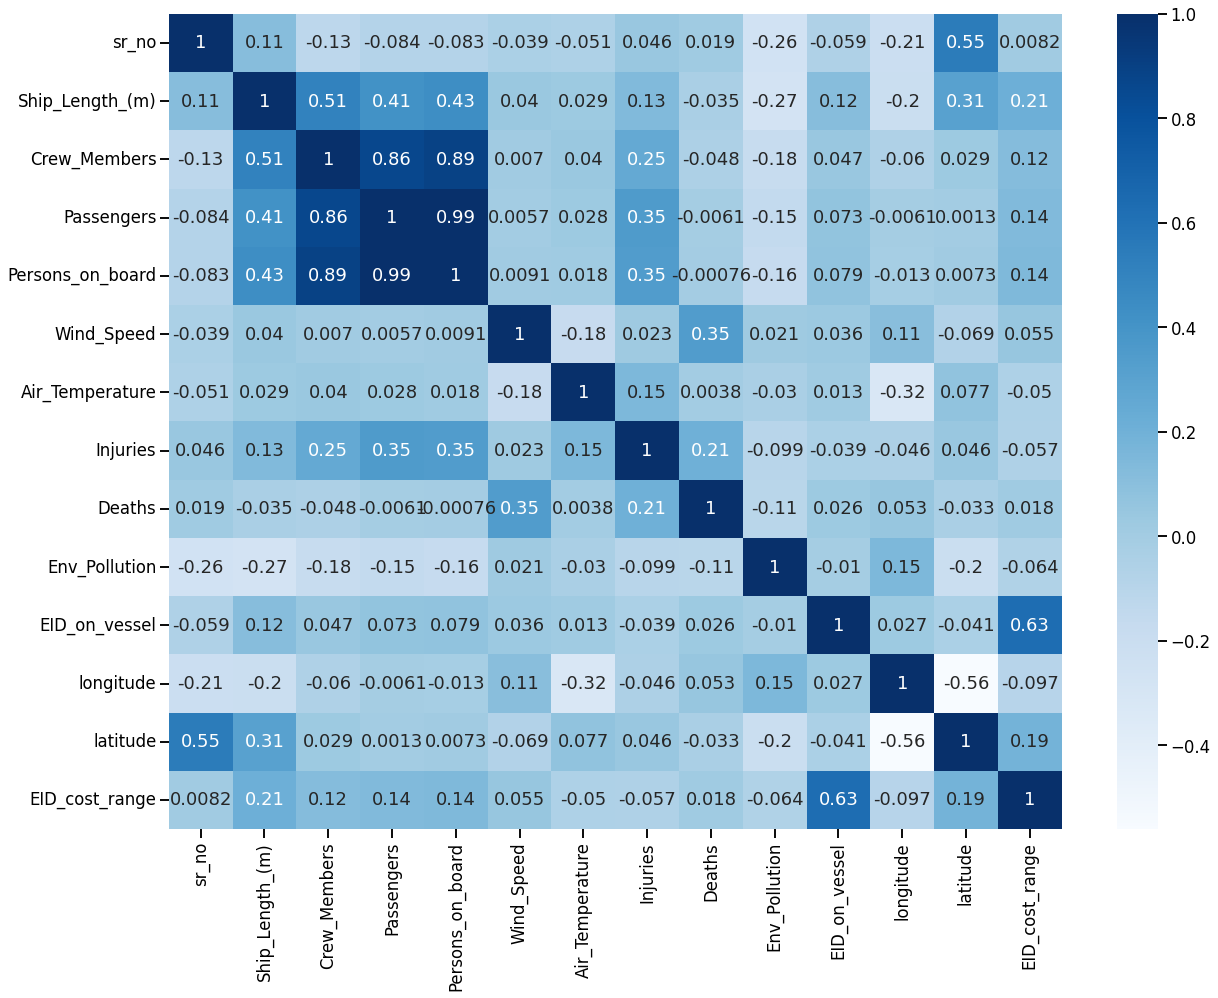

In [ ]:
# Correalation matrix 
sns.set_context('talk')
corr2 = marine2.corr()
plt.figure(figsize = [20,15])
sns.heatmap(corr2, annot=True, cmap="Blues" )
plt.show()

In [ ]:
marine2.columns

Index(['sr_no', 'Vessel_Name', 'Accident_Type', 'Accident_Base_Type',
       'Ship_Type', 'Ship_Base_Type', 'Ship_Length_(m)',
       'Multiple_Ships_Collided_Status', 'Crew_Members', 'Passengers',
       'Persons_on_board', 'Visibility', 'Wind_Direction', 'Wind_Speed',
       'Sea_State', 'Air_Temperature',
       'General_Human_and_organisational_factors',
       'Human_and_organisational_factors_incident_type', 'Date', 'Injuries',
       'Deaths', 'Evacuations', 'Accident_No.', 'Location_Type',
       'Env_Pollution', 'EID_on_vessel', 'longitude', 'latitude', 'Place',
       'Raw', 'EID_cost_range'],
      dtype='object')

- Crew Members , Passengers are having Multicolinerity among themselves so we drop them.

In [ ]:
## Dropping the Inpendent from Target Variable Categorical Columns from Chi Square Test selection.
## and Dropping the Numerical Columns using the Correlation Matrix

marine2.drop(columns = {'sr_no','Raw','Place','Accident_No.','Date',
                        'General_Human_and_organisational_factors',
                       'Human_and_organisational_factors_incident_type','Crew_Members',
                        'Passengers','Vessel_Name','latitude','Accident_Type','Ship_Type',
                       'Wind_Direction','Sea_State','latitude','longitude','EID_on_vessel'},inplace = True)

In [ ]:
## Converting from floating to integer numbers.
## Label Encoding the Variables.

label_encoder = LabelEncoder()
for i in marine2.select_dtypes('object').columns:
    marine2[i] = label_encoder.fit_transform(marine2[i])


In [ ]:
marine2.columns

Index(['Accident_Base_Type', 'Ship_Base_Type', 'Ship_Length_(m)',
       'Multiple_Ships_Collided_Status', 'Persons_on_board', 'Visibility',
       'Wind_Speed', 'Air_Temperature', 'Injuries', 'Deaths', 'Evacuations',
       'Location_Type', 'Env_Pollution', 'EID_cost_range'],
      dtype='object')

Feature: Accident_Base_Type, Score: 0.06585
Feature: Ship_Base_Type, Score: 0.07054
Feature: Ship_Length_(m), Score: 0.22975
Feature: Persons_on_board, Score: 0.11350
Feature: Visibility, Score: 0.05979
Feature: Wind_Speed, Score: 0.11713
Feature: Air_Temperature, Score: 0.13321
Feature: Injuries, Score: 0.05207
Feature: Location_Type, Score: 0.07283


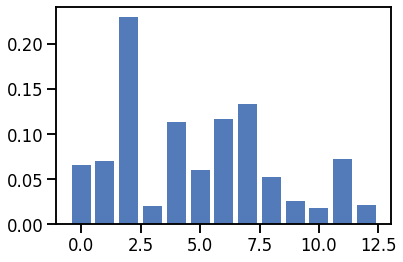

In [ ]:
## Using Model feature Importance by Random Forest.

x = marine2.drop('EID_cost_range',axis=1)
y = marine2.EID_cost_range

#creating empty list for features.
cost_feature = []

#using RandomForest Classifier to extract important features.
model = RandomForestClassifier()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    # keeping threshold of 0.025
    if v>0.050:
        print('Feature: %s, Score: %.5f'% (x.columns[i],v))
        cost_feature.append(x.columns[i])
        
        
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()



In [ ]:
## At last we get out 10 features using Feature Selection.

cost_feature

['Accident_Base_Type',
 'Ship_Base_Type',
 'Ship_Length_(m)',
 'Persons_on_board',
 'Visibility',
 'Wind_Speed',
 'Air_Temperature',
 'Injuries',
 'Location_Type']

## Model Building.

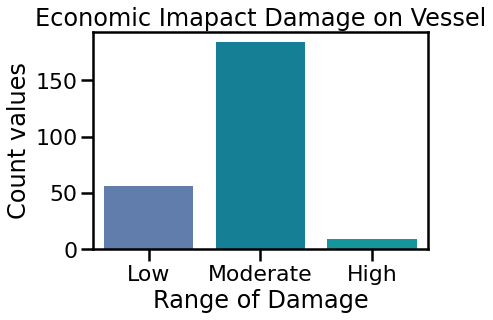

In [ ]:
# Displaying the Target Feature.

sns.set_context('poster')
sns.countplot(x= 'EID_cost_range', data = marine2)
plt.title("Economic Imapact Damage on Vessel")
plt.xlabel("Range of Damage")
plt.ylabel("Count values")
plt.xticks([0,1,2],['Low','Moderate','High'])
plt.show()

In [ ]:
## Unique counts of Target Feature (1 is yes and 0 is no)

marine2.EID_cost_range.value_counts()

1    184
0     56
2      9
Name: EID_cost_range, dtype: int64

In [ ]:
## Oversampling because of unbalanced data.
from imblearn.over_sampling import RandomOverSampler, SMOTE
rs = RandomOverSampler(random_state=42)
os = SMOTE()

## Splitting x and y variable , where y is target
x_cost = marine2[cost_feature]
y_cost = marine2['EID_cost_range']

## Applying Oversampling.
##(tried both Random Sample and SMOTE ,in which we obtain best result for Random Sample)

x_cost, y_cost = rs.fit_resample(x_cost, y_cost) # Random Sample
# x_cost, y_cost = os.fit_resample(x_cost,y_cost) # SMOTE 

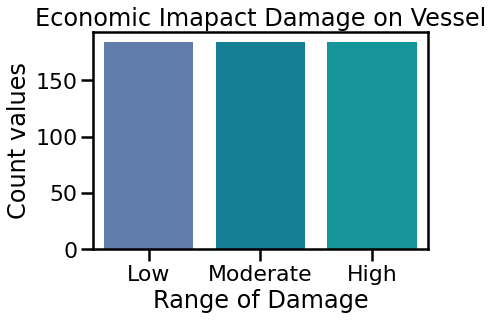

In [ ]:
## After OverSampling

sns.countplot(x = y_cost)
plt.title("Economic Imapact Damage on Vessel")
plt.xlabel("Range of Damage")
plt.ylabel("Count values")
plt.xticks([0,1,2],['Low','Moderate','High'])
plt.show()

In [ ]:
## Applying Minmax scaler and Train test Split

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
list_col = x_cost.columns
marine2[list_col] = scaler.fit_transform(marine2[list_col])


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_cost,
                                                    y_cost,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
## Applying Models

Models = [LogisticRegression(max_iter=100), KNeighborsClassifier(),RandomForestClassifier(),XGBClassifier(),GaussianNB(),DecisionTreeClassifier(),GradientBoostingClassifier(),SVC()]
model_names : str = ['Logistic Regression', 'KNN','Random Forest','XGBoost','Naive Bayes','Decision Tree','Gradient Boosting','SVM']

In [ ]:
# Creating List for Accuracy, F1 Score and Time
final_train_accuracy = []
final_test_accuracy = []
final_F1 = []
final_time = []
final_cross_val_train = []
final_cross_val_test = []

import time
# Looping Each Model for training
for model in Models:
    classifier = model
    start = time.time()
    
    classifier.fit(x_train, y_train)
    y_pred_test =classifier.predict(x_test)
    y_pred_train = classifier.predict(x_train) 
    
    stop = time.time()
    acc_train = accuracy_score(y_train,y_pred_train)
    acc_test = accuracy_score(y_test,y_pred_test)
    
    f1 = f1_score(y_test,y_pred_test,average = 'weighted')
    print("Classification Test  Report \n",classification_report(y_test,y_pred_test))
    print("Classification Train Report \n",classification_report(y_train,y_pred_train))
    
    # t = stop - start
    from sklearn.model_selection import cross_val_score

   
    cross_acc_train = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
    cross_acc_test = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10)
    cross_train = (cross_acc_train.mean()*100)
    cross_test = (cross_acc_test.mean()*100)
    
    
    print(f"Model : {model} having Training Accuracy Score : {acc_test:.2f} with Testing Accuracy Score : {acc_train:.2f} and F1 Score : {f1:.2f} with Time : {stop - start:.2f}")
    print("Training Cross Validation Accuracy : {:.2f} %".format(cross_train.mean()))
    print("Testing Cross Validation Accuracy : {:.2f} %".format(cross_test.mean()))
    print('*'* 50)

    final_train_accuracy.append(round(acc_train * 100, 2))
    final_test_accuracy.append(round(acc_test * 100, 2))
    final_F1.append(round(f1_score(y_test,y_pred_test,average = 'weighted') * 100, 2))
    final_time.append(round((stop-start),2))
    final_cross_val_train.append(round(cross_train))
    final_cross_val_test.append(round(cross_test))


Classification Test  Report 
               precision    recall  f1-score   support

           0       0.44      0.52      0.48        48
           1       0.43      0.25      0.31        53
           2       0.55      0.76      0.64        37

    accuracy                           0.48       138
   macro avg       0.47      0.51      0.48       138
weighted avg       0.47      0.48      0.46       138

Classification Train Report 
               precision    recall  f1-score   support

           0       0.52      0.57      0.54       136
           1       0.62      0.42      0.50       131
           2       0.61      0.74      0.67       147

    accuracy                           0.58       414
   macro avg       0.58      0.58      0.57       414
weighted avg       0.59      0.58      0.58       414

Model : LogisticRegression() having Training Accuracy Score : 0.48 with Testing Accuracy Score : 0.58 and F1 Score : 0.46 with Time : 0.04
Training Cross Validation Accuracy : 57

In [ ]:
data1 = {'Model Name': model_names,
      'Train_Accuracy': final_train_accuracy,
      'Test Accuracy' : final_test_accuracy,
      'Cross_Train': final_cross_val_train,
      'Cross_Test': final_cross_val_test,
      'F1_Score': final_F1,
      'Time': final_time
        }

score_data_cost_pollution = pd.DataFrame(data1)

In [ ]:
score_data_cost_pollution.sort_values(by=['Cross_Train','Cross_Test'],ascending=False)[:]

,Model Name,Train_Accuracy,Test Accuracy,Cross_Train,Cross_Test,F1_Score,Time
2,Random Forest,100.00,93.48,93,75,93.47,0.24
6,Gradient Boosting,99.52,88.41,92,71,88.27,0.36
3,XGBoost,100.00,92.03,91,75,92.03,0.12
5,Decision Tree,100.00,89.13,87,69,88.94,0.00
1,KNN,88.89,76.09,86,63,75.52,0.02
4,Naive Bayes,62.32,52.17,59,43,47.32,0.00
0,Logistic Regression,58.21,47.83,58,46,45.66,0.04
7,SVM,50.48,44.20,49,40,38.94,0.04


### Hyperparameter Tunning

In [ ]:
# parameters_rf = [{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 
#                'max_features': ['auto', 'sqrt'], 
#                'max_depth': [2,4,6,8,10,20,None], 
#                'min_samples_split': [2, 5, 10], 
#                'min_samples_leaf': [1, 2, 4],
#                'bootstrap': [True, False]}]

## used RandomizedSearchCV to obtain the list of parameters for tunning.

from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingRegressor

param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1),
}

## used GridsearchCV to obtain the best parameters.
gridsearch = RandomizedSearchCV(
    GradientBoostingClassifier(), param_distributions=param_distributions,
    scoring="neg_mean_absolute_error", n_iter=20, random_state=0, n_jobs=2
)
gridsearch.fit(x_train,y_train)
print('Best parameters:{0}'.format(gridsearch.best_params_))
print('Best AUC score:{0}'.format(gridsearch.best_score_))
print(gridsearch.cv_results_['mean_test_score'])
print(gridsearch.cv_results_['params'])

Best parameters:{'learning_rate': 0.1098891866898283, 'max_leaf_nodes': 20, 'n_estimators': 200}
Best AUC score:-0.08933294152218631
[-0.37916544 -0.09900088 -0.25836027 -0.17857773 -0.13996474 -0.46626506
 -0.09659124 -0.9734352  -0.35001469 -0.25107258 -0.08933294 -0.37440494
 -0.0941816  -0.35509844 -0.41539818 -0.2414928  -0.28974434 -0.10863944
 -0.10138113 -0.20523068]
[{'learning_rate': 0.1252065381499946, 'max_leaf_nodes': 100, 'n_estimators': 1}, {'learning_rate': 0.16051911333587626, 'max_leaf_nodes': 20, 'n_estimators': 200}, {'learning_rate': 0.07035737028722144, 'max_leaf_nodes': 100, 'n_estimators': 5}, {'learning_rate': 0.0750195444362012, 'max_leaf_nodes': 2, 'n_estimators': 500}, {'learning_rate': 0.03510044230998052, 'max_leaf_nodes': 5, 'n_estimators': 100}, {'learning_rate': 0.4210536704211817, 'max_leaf_nodes': 2, 'n_estimators': 2}, {'learning_rate': 0.7098936257405899, 'max_leaf_nodes': 100, 'n_estimators': 500}, {'learning_rate': 0.014936835544198454, 'max_leaf_

In [ ]:

# Best parameters:{'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt',
#                  'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

parameters = {'learning_rate': 0.1098891866898283, 'max_leaf_nodes': 20, 'n_estimators': 200}
model = GradientBoostingClassifier(**parameters)
model.fit(x_train,y_train)
y_pred_rf = model.predict(x_test)

print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(f1_score(y_test,y_pred_rf, average='weighted' ))


              precision    recall  f1-score   support

           0       0.82      0.96      0.88        48
           1       0.95      0.79      0.87        53
           2       0.97      1.00      0.99        37

    accuracy                           0.91       138
   macro avg       0.92      0.92      0.91       138
weighted avg       0.91      0.91      0.90       138

0.9057971014492754
0.904819654671739


## Evaluation Metrics

Text(0.5, 257.44, 'Predicted label')

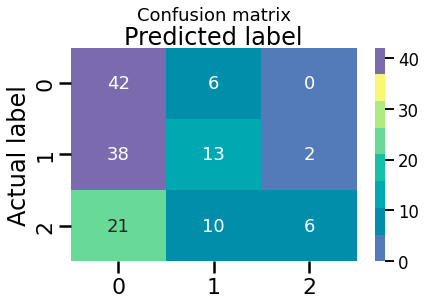

In [ ]:
## 3x3 Confusion matrix, for low:0 , moderate:1 and high:2 of feature EID_cost_range. 

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.set_context('talk', font_scale = 1)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=new_color[:] ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

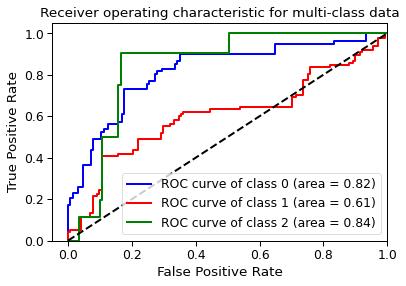

In [ ]:
## ROC Curve for low,moderate,high classes of EID_cost_range Features
sns.set_context('paper',font_scale = 1.4)
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

X = x_cost
y = y_cost

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

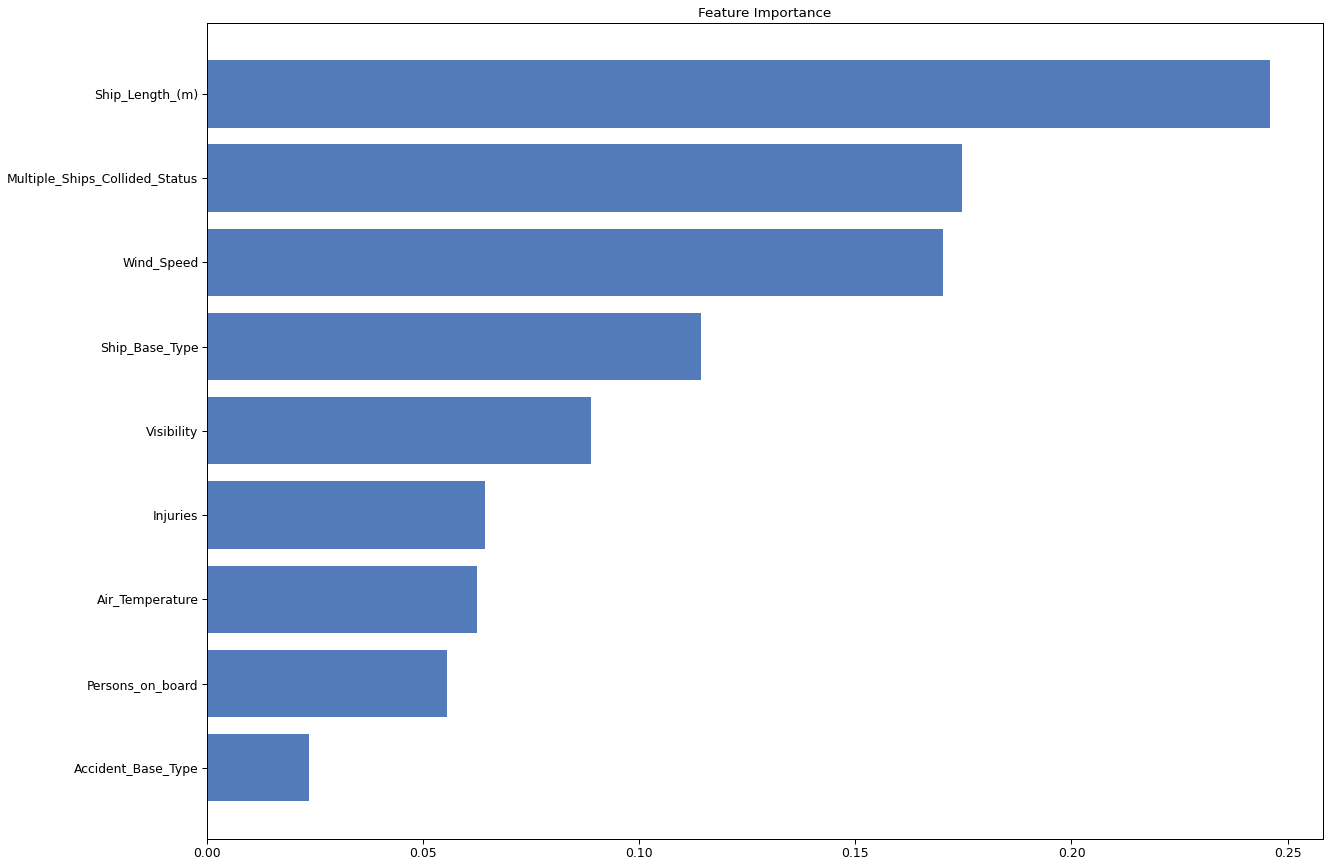

In [ ]:
importances_values = model.feature_importances_
importances = pd.DataFrame(importances_values, columns=['importance'])
feature_data = pd.DataFrame(x.columns, columns=['feature'])
importance = pd.concat([feature_data, importances], axis=1)
importance = importance.sort_values(['importance'], ascending=True)
importance.set_index('feature', inplace=True)
importance = importance.reset_index()

plt.figure(figsize=(20, 15))
plt.barh(importance['feature'].tail(18), importance['importance'].tail(18), color='#537AB9')
plt.title('Feature Importance')
plt.show()